# 201220004 SEMİH TAMER TEPE UYGULAMALI VERİ BİLİMİ FİNAL ÖDEVİ

### Seaborn kullanmak için yüklüyoruz

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [49]:
#gerekli kütüphaneleri import edelim 
def library_import():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LinearRegression
library_import()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [47]:
#veriyi import edelim
def load_data(data_name):
    data=pd.DataFrame(pd.read_excel(data_name))
    return data
data=load_data('data.xlsx')
# tekrarlayan verilere bakalım ve tekrarlayan verileri silelim
def drop_duplicates_for_data(data):
    duplicates = data[data.duplicated()]
    data.drop_duplicates(inplace=True)
    #print(f"Veri yüklenmiştir ve {len(duplicates)} sayıda tekrar eden veri silinmiştir")
    
drop_duplicates_for_data(data)

## Verilerimizi daha iyi tanımak için eşsiz değerleri inceleyelim

In [4]:
def get_unique_values(data):
    print(f"Bellek Hızı için eşşsiz değerler: \n {data['Bellek Hızı'].unique()}")
    print(f"Cihaz Ağırlığı için eşşsiz değerler: \n {data['Cihaz Ağırlığı'].unique()}")
    print(f"Ekran Boyutu için eşşsiz değerler: \n {data['Ekran Boyutu'].unique()}")
    print(f"Ekran Kartı Bellek Tipi için eşşsiz değerler: \n {data['Ekran Kartı Bellek Tipi'].unique()}")
    print(f"Ekran Kartı Hafızası için eşşsiz değerler: \n {data['Ekran Kartı Hafızası'].unique()}")
    print(f"Ekran Kartı Tipi için eşşsiz değerler: \n {data['Ekran Kartı Tipi'].unique()}")
    print(f"Ekran Panel Tipi için eşşsiz değerler: \n {data['Ekran Panel Tipi'].unique()}")
    print(f"İşlemci Nesli için eşşsiz değerler: \n {data['İşlemci Nesli'].unique()}")
    print(f"İşlemci için eşşsiz değerler: \n {data['İşlemci'].unique()}")
    print(f"İşletim Sistemi için eşşsiz değerler: \n {data['İşletim Sistemi'].unique()}")
    print(f"Kart Okuyucu  için eşşsiz değerler: \n {data['Kart Okuyucu'].unique()}")
    print(f"Aydınlatma için eşşsiz değerler: \n {data['Aydınlatma'].unique()}")
    print(f"Maksimum İşlemci Hızı için eşşsiz değerler: \n {data['Maksimum İşlemci Hızı'].unique()}")
    print(f"Max Ekran Çözünürlüğü için eşşsiz değerler: \n {data['Max Ekran Çözünürlüğü'].unique()}")
    print(f"Parmak İzi Okuyucu için eşşsiz değerler: \n {data['Parmak İzi Okuyucu'].unique()}")
    print(f"Ram (Sistem Belleği) için eşşsiz değerler: \n {data['Ram (Sistem Belleği)'].unique()}")
    print(f"SSD Kapasitesi için eşşsiz değerler: \n {data['SSD Kapasitesi'].unique()}")
    print(f"Ürün Modeli için eşşsiz değerler: \n {data['Ürün Modeli'].unique()}")
    print(f"Fiyat için eşşsiz değerler: \n {data['Fiyat'].unique()}")
get_unique_values(data)

Bellek Hızı için eşşsiz değerler: 
 ['1066 MHz' '3200 MHz' '2933 MHz' nan '2666 MHz' '2400 MHz' '3000 MHz'
 '3733 MHz' '4267 MHz' '4800 MHz' '5200 MHz' '4266 MHz' '6400 MHz'
 '1600 MHz' '5500 MHz' '1866 MHz' '2133 MHz']
Cihaz Ağırlığı için eşşsiz değerler: 
 [nan '1 - 2 kg' '2 - 4 kg' '2 kg ve Altı' '4 kg ve Üstü']
Ekran Boyutu için eşşsiz değerler: 
 ['10 inç' '15,6 inç' '13,3 inç' '14 inç' '17,3 inç' '13 inç' '16 inç'
 '16,1 inç' '12,3 inç' '14,1 inç' '18 inç' '18,4 inç' '17 inç' '13,4 inç'
 '15 inç' '13,5 inç' '11,6 inç']
Ekran Kartı Bellek Tipi için eşşsiz değerler: 
 [nan 'GDDR4' 'GDDR5' 'GDDR6' 'Onboard' 'DDR3' 'DDR5' 'GDDR6X']
Ekran Kartı Hafızası için eşşsiz değerler: 
 ['1 GB' '2 GB' '4 GB' '8 GB' 'Paylaşımlı' '6 GB' nan '12 GB' '16 GB']
Ekran Kartı Tipi için eşşsiz değerler: 
 [nan 'Harici Ekran Kartı' 'Yüksek Seviye Harici Ekran Kartı'
 'Dahili Ekran Kartı']
Ekran Panel Tipi için eşşsiz değerler: 
 ['IPS' 'LED' 'TN' 'SVA' 'WVA' 'OLED' 'LTPS' 'Mini LED'
 'Liquid Retina Ekran'

## Eksik değerleri ve korelasyonları inceleyelim

Eksik deger sayıları:
 Bellek Hızı                79
Cihaz Ağırlığı              7
Ekran Boyutu                0
Ekran Kartı Bellek Tipi    78
Ekran Kartı Hafızası       28
Ekran Kartı Tipi           22
Ekran Panel Tipi            0
İşlemci Nesli              26
İşlemci                    12
İşletim Sistemi             0
Kart Okuyucu               96
Aydınlatma                  0
Maksimum İşlemci Hızı      25
Max Ekran Çözünürlüğü       4
Parmak İzi Okuyucu         80
Ram (Sistem Belleği)        6
SSD Kapasitesi              3
Ürün Modeli                 0
Fiyat                       0
dtype: int64

Korelasyonlar: 

Axes(0.125,0.11;0.62x0.77)


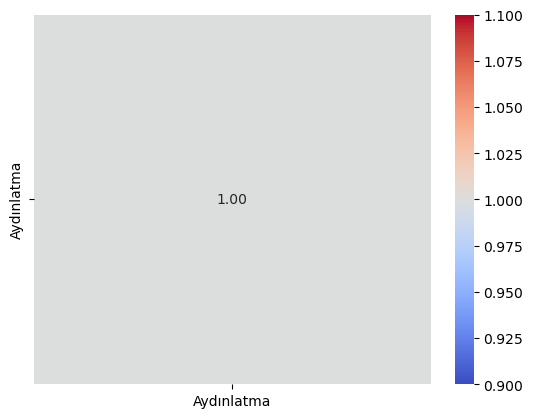

In [5]:
def examination_data(data):
    print(f"Eksik deger sayıları:\n {data.isnull().sum()}")
    print("\nKorelasyonlar: \n")
    #korelasyon hesaplamak için max işlemci hızı için ghz ifadelerini atıcaz ve sayısal ifadeler yapıcaz 

    print(sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt=".2f"))
examination_data(data)

## Yukarıdaki grafiten anlaşılmalıdır ki sutunların ilişkilerini anlayabilmek için verimizi ön işlemeye sokmalıyız ve aynı zamanda da eksik değerlerimiz azımsanamayacak kadar fazla o yüzden eksik değerleri direkt olarak silemeyiz doldurma stratejisi belirleyip doldurmalıyız.

### Öncelikle preprocessing işlemini yapalım

## Gerekli dönüştürmeleri gerçekleştirelim ve eksik değerleri dolduralım eksik değerleri doldururken bazı ml algoritmalarından yararlandım

In [48]:
def preproccesing(data):
    def round_to_nearest_128_multiple(number):
        # Yukarı yuvarlama ile en yakın 4'ün katına
        rounded_up = np.ceil(number / 128) * 128    
        # Aşağı yuvarlama ile en yakın 4'ün katına
        rounded_down = np.floor(number / 128) * 128    
        # Mantıksal koşul oluşturma
        condition = abs(rounded_up - number) < abs(number - rounded_down)    
        # En yakın olanı seçme
        result = np.where(condition, rounded_up, rounded_down)
    
        return result

    def duzenle_ssd_kapasitesi(df):
        def tb_to_gb(value):
            if isinstance(value, str):
                if "TB" in value:
                    return float(value.replace("TB", "")) * 1024  # 1 TB = 1024 GB
                elif "GB" in value:
                    return float(value.replace("GB", ""))
            return value

        df['SSD Kapasitesi'] = df['SSD Kapasitesi'].apply(tb_to_gb)
        df['SSD Kapasitesi'] = pd.to_numeric(df['SSD Kapasitesi'], errors='coerce')
        #500 gb gibi bir değerin olamıycağı için onu 512 ye yuvarlamak adına
        df['SSD Kapasitesi']=round_to_nearest_128_multiple(df['SSD Kapasitesi'])
    
        return df

    def duzenle_ekran_karti_hafizasi(df):
        def duzenle_hafiza(value):
            if isinstance(value, str):
                if "Paylaşımlı" in value:
                    return 0
                elif "GB" in value:
                    return int(value.replace("GB", ""))
            return value

        df['Ekran Kartı Hafızası'] = df['Ekran Kartı Hafızası'].apply(duzenle_hafiza)
        df['Ekran Kartı Hafızası'] = pd.to_numeric(df['Ekran Kartı Hafızası'], errors='coerce')

        return df

    def duzenle_kart_okuyucu_durumu(df):
        df['Kart Okuyucu'] = df['Kart Okuyucu'].apply(lambda x: 1 if (isinstance(x, str) and x.strip().lower() == 'var') else (0 if (isinstance(x, str) and x.strip().lower() == 'yok') else np.nan))
        df['Kart Okuyucu'] = df['Kart Okuyucu'].astype(str).replace({'1': 1, '0': 0, 'nan': np.nan})
        return df
    
    def duzenle_parmak_izi_okuyucu_durumu(df):
        df['Parmak İzi Okuyucu'] = df['Parmak İzi Okuyucu'].apply(lambda x: 1 if (isinstance(x, str) and x.strip().lower() == 'var') else (0 if (isinstance(x, str) and x.strip().lower() == 'yok') else np.nan))
        df['Parmak İzi Okuyucu'] = df['Parmak İzi Okuyucu'].astype(str).replace({'1': 1, '0': 0, 'nan': np.nan})
        return df
    
    def siniflandır_cihaz_agirligi(df):
        siniflama = {'2 kg ve Altı': 0, '1 - 2 kg': 1, '2 - 4 kg': 2, '4 kg ve Üstü': 3}
        df['Cihaz Ağırlığı'] = df['Cihaz Ağırlığı'].map(siniflama)
        return df
    
    def siniflandir_fiyat(df):
        siniflama_fiyat = {'Çok Düşük': 0, 'Düşük': 1, 'Orta': 2, 'Yüksek': 3, 'Çok Yüksek': 4}
        df['Fiyat'] = df['Fiyat'].map(siniflama_fiyat)
        return df
    
    def siniflandir_panel_fiyati(df):
        panel_fiyat_siralamasi = {
            'IPS': 0, 
            'LED': 1, 
            'TN': 2, 
            'SVA': 3, 
            'WVA': 4, 
            'OLED': 5, 
            'LTPS': 6, 
            'Mini LED': 7, 
            'Liquid Retina Ekran': 8, 
            'Liquid Retina XDR': 9
        }
        df['Ekran Panel Tipi']=df['Ekran Panel Tipi'].map(panel_fiyat_siralamasi)
        return df
    
    def duzenle_bellek_hizi(data):
        data['Bellek Hızı'] = data['Bellek Hızı'].str.replace(' MHz', '')
        data['Bellek Hızı'] = pd.to_numeric(data['Bellek Hızı'], errors='coerce')
        
    def siniflandir_islemci_nesli(data):
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        data['İşlemci Nesli'] = label_encoder.fit_transform(data['İşlemci Nesli'])
        
    def siniflandir_ekran_karti_tipi(data):
        data['Ekran Kartı Tipi'] = data['Ekran Kartı Tipi'].map({'Yüksek Seviye Harici Ekran Kartı': 2, 'Harici Ekran Kartı': 1, 'Dahili Ekran Kartı': 0})
    
    def siniflandir_ekran_karti_bellek_tipi(data):
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        data['Ekran Kartı Bellek Tipi'] = label_encoder.fit_transform(data['Ekran Kartı Bellek Tipi'])
    

       
                              
    #metotları kullanarak preparing yapalım
    def preparing_data_for_correlation(data):
        if data['Maksimum İşlemci Hızı'].dtype == 'O':  # 'O', Object (string) tipini temsil eder
            # GHz ifadesini kaldırma (büyük-küçük harf duyarlılığı olmadan)
            data['Maksimum İşlemci Hızı'] = data['Maksimum İşlemci Hızı'].str.replace(" GHz", "", case=False)
            # Virgülü noktaya çevirme (float tipinde bir sayıya dönüştürme için)
            data['Maksimum İşlemci Hızı'] = data['Maksimum İşlemci Hızı'].str.replace(",", ".")
            # Sayısal değeri elde etme
            data['Maksimum İşlemci Hızı'] = data['Maksimum İşlemci Hızı'].astype(float)
        #ekran boyutu için inç ifadesini atıcaz
        if data['Ekran Boyutu'].dtype == 'O':  # 'O', Object (string) tipini temsil eder
            # inç ifadesini kaldırma (büyük-küçük harf duyarlılığı olmadan)
            data['Ekran Boyutu'] = data['Ekran Boyutu'].str.replace(" inç", "", case=False)
            # Virgülü noktaya çevirme (float tipinde bir sayıya dönüştürme için)
            data['Ekran Boyutu'] = data['Ekran Boyutu'].str.replace(",", ".")
            # Sayısal değeri elde etme
            data['Ekran Boyutu'] = data['Ekran Boyutu'].astype(float)
        #ekran kartı hafızası için gb ifadesini atıcaz paylaşımlılar var paylaşımlıya 0 diyceğim çünkü
        #paylaşımsız ekran kartlarında da ramde işlemcide ekran kartı olarak kullanılabilir
        data=duzenle_ekran_karti_hafizasi(data)
    
        #kart okuyucu için var 1 yok 0 olarak değişitiricez
        data=duzenle_kart_okuyucu_durumu(data)
        #Ram için gb ı atıcaz
        if data['Ram (Sistem Belleği)'].dtype == 'O':  # 'O', Object (string) tipini temsil eder
            # Boşluk karakterini temizleme
            data['Ram (Sistem Belleği)'] = data['Ram (Sistem Belleği)'].str.replace("\xa0", "")
            # GB ifadesini kaldırma (büyük-küçük harf duyarlılığı olmadan)
            data['Ram (Sistem Belleği)'] = data['Ram (Sistem Belleği)'].str.replace("GB", "", case=False)
            # Virgülü noktaya çevirme (float tipinde bir sayıya dönüştürme için)
            data['Ram (Sistem Belleği)'] = data['Ram (Sistem Belleği)'].str.replace(",", ".")
            # Sayısal değeri elde etme
            data['Ram (Sistem Belleği)'] = data['Ram (Sistem Belleği)'].astype(float)
        #parmak izi okuyucu için var 1 yok 0 olarak değiştiricez
        data=duzenle_parmak_izi_okuyucu_durumu(data)
        #SSD için TB ları GB a çevirip GB ifadesini kaldırıcaz
        if data['SSD Kapasitesi'].dtype == 'O':  # 'O', Object (string) tipini temsil eder
            data=duzenle_ssd_kapasitesi(data)
        #Cihaz Ağırlığını ordinal sıralayalım
        data=siniflandır_cihaz_agirligi(data)
        #Fiyata göre sınıflandıralım
        data=siniflandir_fiyat(data)
        #Ekran Panel Tipine göre
        data=siniflandir_panel_fiyati(data)
        #Bellek Hızı için
        duzenle_bellek_hizi(data)
        #islemci nesli için
        siniflandir_islemci_nesli(data)
        #ekran kartı tipi için
        siniflandir_ekran_karti_tipi(data)
        #ekran kartı bellek tipi için
        siniflandir_ekran_karti_bellek_tipi(data)

    #preparing metodunu çalıştıralım
    preparing_data_for_correlation(data)
    
    
    #EKSİK DEĞERLERİ İNCELEYELİM
    def fillna_all_columns(data):
        def fillna_cihaz_agirligi(data):
            #eksik değerleri doldurma
            #Cihaz ağırlığı için: cihaz ağırlığını etkileyen değişkenler ekran boyutu,ram,ssd kapasitesi,aydınlatma,ekran kartı hafızası örneğin rtx 4090 2.4 kg değerleri etkindir.
            # Eksik olan 'Cihaz Ağırlığı' değerlerini tahmin etmek için bir regresyon modeli oluşturun
            from sklearn.linear_model import LinearRegression
            # Eğitim veri setini oluşturun
            train_data = data.dropna(subset=['Ekran Boyutu', 'Ekran Kartı Hafızası', 'Ram (Sistem Belleği)', 'SSD Kapasitesi', 'Cihaz Ağırlığı'])
            # Eğitim verileri
            X_train = train_data[['Ekran Boyutu', 'Ekran Kartı Hafızası', 'Ram (Sistem Belleği)', 'SSD Kapasitesi']]
            y_train = train_data['Cihaz Ağırlığı']

            # Modeli eğitin
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Tahmin edilecek veri setini oluşturun
            # 'Cihaz Ağırlığı' sütununu tahmin edin
            predicted_weights = model.predict(X_train)
            #print(predicted_weights)
            data['Cihaz Ağırlığı'].fillna(round(predicted_weights.mean()), inplace=True)
        
        def fillna_bellek_hizi(data):
            # mode() seri nesnesi ürettiği için en çok tekrarlanan ilkini aldık
            bellek_hizi=data['Bellek Hızı'].mode().iloc[0]
            data['Bellek Hızı'].fillna(bellek_hizi, inplace=True)
        
        def fillna_ekran_boyutu(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            data['Ekran Boyutu'] = imputer.fit_transform(data[['Ekran Boyutu']])
    
        def fillna_ekran_karti_bellek_tipi(data):
            # mode() seri nesnesi ürettiği için en çok tekrarlanan ilkini aldık
            value=data['Ekran Kartı Bellek Tipi'].mode().iloc[0]
            data['Ekran Kartı Bellek Tipi'].fillna(value, inplace=True)
    
        def fillna_ekran_karti_hafizasi(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            data['Ekran Kartı Hafızası'] = imputer.fit_transform(data[['Ekran Kartı Hafızası']])
        
        def fillna_ekran_karti_tipi(data):
            # mode() seri nesnesi ürettiği için en çok tekrarlanan ilkini aldık
            value=data['Ekran Kartı Tipi'].mode().iloc[0]
            data['Ekran Kartı Tipi'].fillna(value, inplace=True)
    
        def fillna_ekran_panel_tipi(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            data['Ekran Panel Tipi'] = imputer.fit_transform(data[['Ekran Panel Tipi']])
    
        def fillna_islemci_nesli(data):
            # mode() fonksiyonunun döndüğü değerin tipini kontrol et
            mode_value = data['İşlemci Nesli'].mode().iloc[0].astype(str)
            data['İşlemci Nesli'].fillna(mode_value, inplace=True)
        
        def fillna_islemci(data):
            # İşlemci nesli ve ürün modeline göre gruplayın ve en çok tekrar eden değeri alalım
            most_frequent_processors = data.groupby(['İşlemci Nesli', 'Ürün Modeli'])['İşlemci'].apply(lambda x: x.mode().iloc[0])
    
            # Eksik değerleri dolduralım
            for index, value in most_frequent_processors.items():
                mask = (data['İşlemci Nesli'] == index[0]) & (data['Ürün Modeli'] == index[1]) & data['İşlemci'].isnull()
                data.loc[mask, 'İşlemci'] = value
        
        def fillna_isletim_sistemi(data):
            # İşletim sistemini işlemci nesline göre en çok tekrar eden değere göre dolduralım
            most_frequent_processors = data.groupby(['İşlemci Nesli'])['İşletim Sistemi'].apply(lambda x: x.mode().iloc[0])
    
            # Eksik değerleri dolduralım
            for index, value in most_frequent_processors.items():
                mask = (data['İşlemci Nesli'] == index) & (data['İşletim Sistemi'].isnull())
                data.loc[mask, 'İşletim Sistemi'] = value
            
        def fillna_kart_okuyucu(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            values= imputer.fit_transform(data[['Kart Okuyucu']])
            values=np.round(values)
            data['Kart Okuyucu'] =values
        
        def fillna_aydinlatma(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            values= imputer.fit_transform(data[['Aydınlatma']])
            values=np.round(values)
            data['Aydınlatma'] =values
    
        def fillna_maks_islemci_hizi(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=1, weights="uniform")
            values= imputer.fit_transform(data[['Maksimum İşlemci Hızı']])
            data['Maksimum İşlemci Hızı'] = np.round(values,1)
        
        def fillna_max_ekran_cozunurlugu(data):
            most_frequent_processors = data.groupby(['Ekran Panel Tipi'])['Max Ekran Çözünürlüğü'].apply(lambda x: x.mode().iloc[0])
    
            # Eksik değerleri dolduralım
            for index, value in most_frequent_processors.items():
                mask = (data['Ekran Panel Tipi'] == index) & (data['Max Ekran Çözünürlüğü'].isnull())
                data.loc[mask, 'Max Ekran Çözünürlüğü'] = value
        
        def fillna_parmak_izi_okuyucu(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            values= imputer.fit_transform(data[['Parmak İzi Okuyucu']])
            values=np.round(values)
            data['Parmak İzi Okuyucu'] =values
        
        def round_to_nearest_4_multiple(number):
            # Yukarı yuvarlama ile en yakın 4'ün katına
            rounded_up = np.ceil(number / 4) * 4    
            # Aşağı yuvarlama ile en yakın 4'ün katına
            rounded_down = np.floor(number / 4) * 4    
            # Mantıksal koşul oluşturma
            condition = abs(rounded_up - number) < abs(number - rounded_down)    
            # En yakın olanı seçme
            result = np.where(condition, rounded_up, rounded_down)
    
            return result

        def fillna_ram(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            values= imputer.fit_transform(data[['Ram (Sistem Belleği)']])
            data['Ram (Sistem Belleği)'] = round_to_nearest_4_multiple(values)
        
        # SSD Kapasitesi
        def round_to_nearest_128_multiple(number):
            # Yukarı yuvarlama ile en yakın 4'ün katına
            rounded_up = np.ceil(number / 128) * 128    
            # Aşağı yuvarlama ile en yakın 4'ün katına
            rounded_down = np.floor(number / 128) * 128    
            # Mantıksal koşul oluşturma
            condition = abs(rounded_up - number) < abs(number - rounded_down)    
            # En yakın olanı seçme
            result = np.where(condition, rounded_up, rounded_down)
    
            return result

        def fillna_ssd(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            values= imputer.fit_transform(data[['SSD Kapasitesi']])
            data['SSD Kapasitesi'] = round_to_nearest_128_multiple(values)
        
        def fillna_urun_modeli(data):
            # Ürün modelinin eksik değerlerini tahmin için İşlemci Nesli,İşlemci,Ram,SSD ye göre gruplayalım ve en çok tekrar eden değeri alalım
            most_frequent_processors = data.groupby(['İşlemci Nesli', 'İşlemci', 'Ram (Sistem Belleği)', 'SSD Kapasitesi'])['Ürün Modeli'].apply(lambda x: x.mode().iloc[0])
    
            # Eksik değerleri dolduralım
            for index, value in most_frequent_processors.items():
                mask = (data['İşlemci Nesli'] == index[0]) & (data['İşlemci'] == index[1]) & (data['Ram (Sistem Belleği)'] == index[2]) & (data['SSD Kapasitesi'] == index[3]) & data['Ürün Modeli'].isnull()
                data.loc[mask, 'Ürün Modeli'] = value
            
        def fillna_fiyat(data):
            from sklearn.impute import KNNImputer
            imputer = KNNImputer(n_neighbors=10)
            values= imputer.fit_transform(data[['Fiyat']])
            data['Fiyat'] = np.round(values)
        
        def fillna_all(data):
            fillna_bellek_hizi(data)
            fillna_cihaz_agirligi(data)
            fillna_ekran_boyutu(data)
            fillna_ekran_karti_bellek_tipi(data)
            fillna_ekran_karti_hafizasi(data)
            fillna_ekran_karti_tipi(data)
            fillna_ekran_panel_tipi(data)
            fillna_islemci_nesli(data)
            fillna_islemci(data)
            fillna_isletim_sistemi(data)
            fillna_kart_okuyucu(data)
            fillna_aydinlatma(data)
            fillna_maks_islemci_hizi(data)
            fillna_max_ekran_cozunurlugu(data)
            fillna_parmak_izi_okuyucu(data)
            fillna_ram(data)
            fillna_ssd(data)
            fillna_urun_modeli(data)
            fillna_fiyat(data)
    
        fillna_all(data)
    
    fillna_all_columns(data)
    
preproccesing(data)


In [45]:
data.head()

,Bellek Hızı,Cihaz Ağırlığı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci Nesli,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Max Ekran Çözünürlüğü,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
0,1066.0,1.0,10.0,7,1.0,0.0,0.0,0,1000M,Android,1.0,0.0,1.0,1920 x 1080,0.0,16.0,1024.0,Notebook,4.0
2,1066.0,1.0,10.0,7,1.0,0.0,0.0,0,1000M,Android,1.0,0.0,1.0,1920 x 1080,0.0,16.0,1024.0,Notebook,2.0
3,3200.0,1.0,15.6,2,2.0,1.0,1.0,1,1035G1,Windows 10 Home,1.0,0.0,3.6,1920 x 1080,0.0,8.0,512.0,Notebook,1.0
4,3200.0,1.0,15.6,3,2.0,1.0,1.0,1,1035G1,Windows 10 Home,0.0,0.0,3.6,1920 x 1080,0.0,12.0,1024.0,Notebook,1.0
5,2933.0,2.0,15.6,4,4.0,2.0,0.0,1,10300H,Yok (Free Dos),0.0,0.0,4.5,1920 x 1080,0.0,16.0,512.0,Oyun Bilgisayarları,1.0


In [8]:
data.isnull().sum()

Bellek Hızı                0
Cihaz Ağırlığı             0
Ekran Boyutu               0
Ekran Kartı Bellek Tipi    0
Ekran Kartı Hafızası       0
Ekran Kartı Tipi           0
Ekran Panel Tipi           0
İşlemci Nesli              0
İşlemci                    0
İşletim Sistemi            0
Kart Okuyucu               0
Aydınlatma                 0
Maksimum İşlemci Hızı      0
Max Ekran Çözünürlüğü      0
Parmak İzi Okuyucu         0
Ram (Sistem Belleği)       0
SSD Kapasitesi             0
Ürün Modeli                0
Fiyat                      0
dtype: int64

<p><b>Yukarıdaki ifadeden artık eksik değerlerimizin kalmadığı görülmektedir</b></p>

### Verimizin son halini inceleyelim

In [9]:
data.head()

,Bellek Hızı,Cihaz Ağırlığı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci Nesli,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Max Ekran Çözünürlüğü,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
0,1066.0,1.0,10.0,7,1.0,0.0,0.0,0,1000M,Android,1.0,0.0,1.0,1920 x 1080,0.0,16.0,1024.0,Notebook,4.0
2,1066.0,1.0,10.0,7,1.0,0.0,0.0,0,1000M,Android,1.0,0.0,1.0,1920 x 1080,0.0,16.0,1024.0,Notebook,2.0
3,3200.0,1.0,15.6,2,2.0,1.0,1.0,1,1035G1,Windows 10 Home,1.0,0.0,3.6,1920 x 1080,0.0,8.0,512.0,Notebook,1.0
4,3200.0,1.0,15.6,3,2.0,1.0,1.0,1,1035G1,Windows 10 Home,0.0,0.0,3.6,1920 x 1080,0.0,12.0,1024.0,Notebook,1.0
5,2933.0,2.0,15.6,4,4.0,2.0,0.0,1,10300H,Yok (Free Dos),0.0,0.0,4.5,1920 x 1080,0.0,16.0,512.0,Oyun Bilgisayarları,1.0


In [10]:
data.shape

(742, 19)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bellek Hızı,742.0,3335.157682,610.060167,1066.0,3200.0,3200.0,3200.00,6400.0
Cihaz Ağırlığı,742.0,1.231806,0.597034,0.0,1.0,1.0,2.00,3.0
Ekran Boyutu,742.0,15.369407,0.890007,10.0,15.6,15.6,15.60,18.4
Ekran Kartı Bellek Tipi,742.0,5.227763,1.296995,0.0,4.0,6.0,6.00,7.0
Ekran Kartı Hafızası,742.0,1.843137,2.787196,0.0,0.0,0.0,4.00,16.0
Ekran Kartı Tipi,742.0,0.575472,0.790696,0.0,0.0,0.0,1.00,2.0
Ekran Panel Tipi,742.0,1.041779,1.716674,0.0,0.0,0.0,2.00,9.0
İşlemci Nesli,742.0,6.256065,5.601637,0.0,3.0,4.0,8.00,22.0
Kart Okuyucu,742.0,0.595687,0.491090,0.0,0.0,1.0,1.00,1.0
Aydınlatma,742.0,0.250674,0.433693,0.0,0.0,0.0,0.75,1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 989
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bellek Hızı              742 non-null    float64
 1   Cihaz Ağırlığı           742 non-null    float64
 2   Ekran Boyutu             742 non-null    float64
 3   Ekran Kartı Bellek Tipi  742 non-null    int32  
 4   Ekran Kartı Hafızası     742 non-null    float64
 5   Ekran Kartı Tipi         742 non-null    float64
 6   Ekran Panel Tipi         742 non-null    float64
 7   İşlemci Nesli            742 non-null    int32  
 8   İşlemci                  742 non-null    object 
 9   İşletim Sistemi          742 non-null    object 
 10  Kart Okuyucu             742 non-null    float64
 11  Aydınlatma               742 non-null    float64
 12  Maksimum İşlemci Hızı    742 non-null    float64
 13  Max Ekran Çözünürlüğü    742 non-null    object 
 14  Parmak İzi Okuyucu       742 no

### Aykırı değerleri inceleyelim

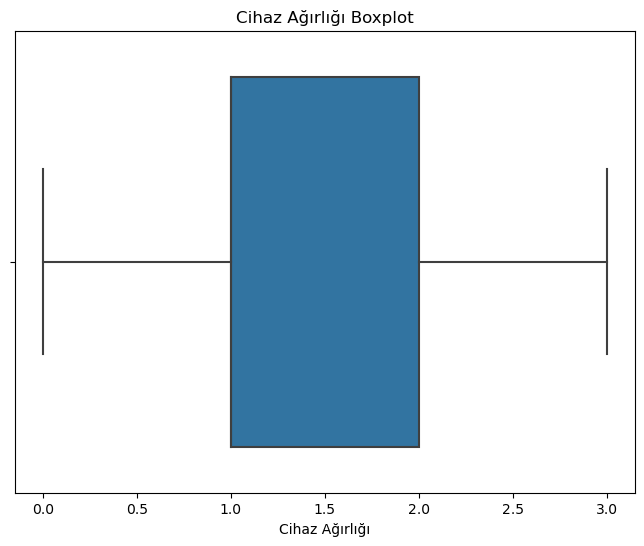

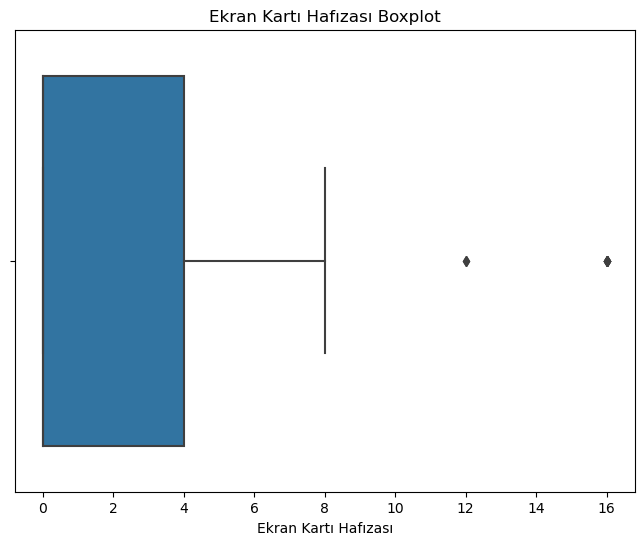

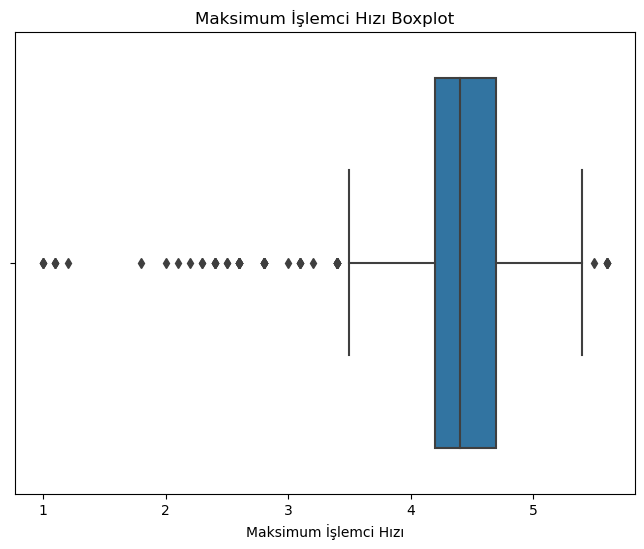

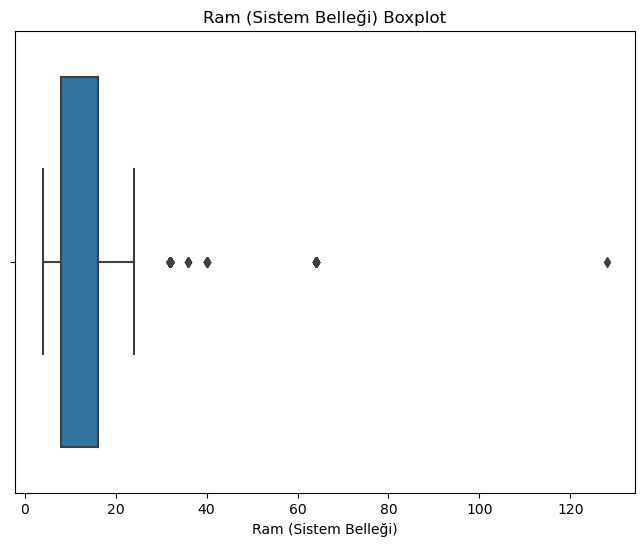

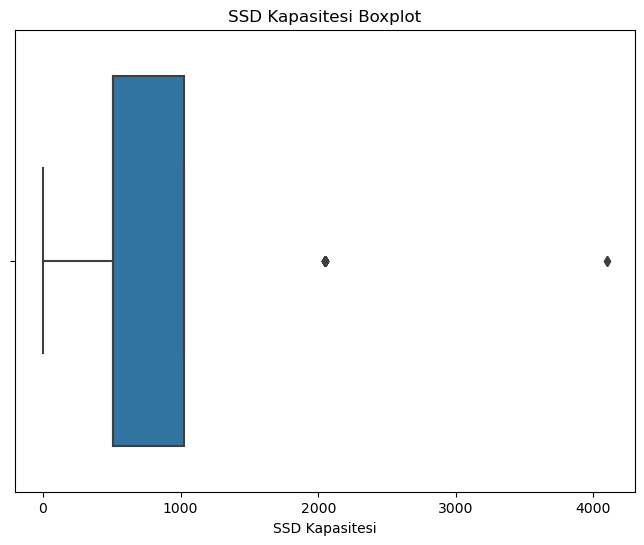

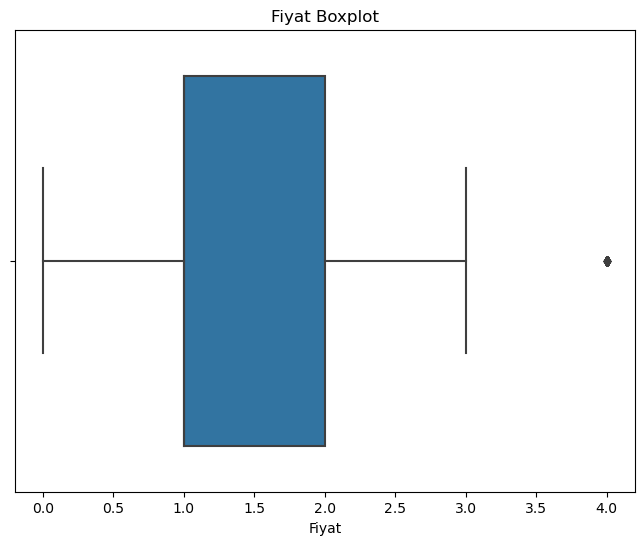

In [13]:
#Aykırı değerleri göstermek
def handle_outliers_visual(data):
    columns_to_handle = ['Cihaz Ağırlığı', 'Ekran Kartı Hafızası', 'Maksimum İşlemci Hızı', 'Ram (Sistem Belleği)', 'SSD Kapasitesi', 'Fiyat']
    for column in columns_to_handle:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column])
        plt.title(f'{column} Boxplot')
        plt.show()
handle_outliers_visual(data)

In [14]:
#Aykırı verileri incelemek
def handle_outliers(data, column_name, lower_limit, upper_limit):
    # Alt sınırdan küçük olan değerleri alt sınıra ata
    data[column_name] = data[column_name].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Üst sınırdan büyük olan değerleri üst sınıra ata
    data[column_name] = data[column_name].apply(lambda x: upper_limit if x > upper_limit else x)

def handle_outliers_all(data):
    columns_to_handle = ['Cihaz Ağırlığı', 'Ekran Boyutu', 'Ekran Kartı Hafızası', 'Maksimum İşlemci Hızı', 'Ram (Sistem Belleği)', 'SSD Kapasitesi', 'Fiyat']
    for column in columns_to_handle:
        lower_limit = data[column].quantile(0.05)  # Alt sınır için örnek: %5'lik quantile
        upper_limit = data[column].quantile(0.95)  # Üst sınır için örnek: %95'lik quantile
        print(f"{column} için:\nalt limit {lower_limit} \nüst limit {upper_limit}")

handle_outliers_all(data)

Cihaz Ağırlığı için:
alt limit 0.0 
üst limit 2.0
Ekran Boyutu için:
alt limit 14.0 
üst limit 16.1
Ekran Kartı Hafızası için:
alt limit 0.0 
üst limit 8.0
Maksimum İşlemci Hızı için:
alt limit 2.8100000000000005 
üst limit 5.0
Ram (Sistem Belleği) için:
alt limit 8.0 
üst limit 32.0
SSD Kapasitesi için:
alt limit 256.0 
üst limit 1024.0
Fiyat için:
alt limit 0.0 
üst limit 4.0


<p><b>Yukarıdaki ifadeleri incelediğimizde verimiz bilgisayar özellikleri verisi olduğundan dolayı aykırı gözlemler için baskılama yöntemi uygulamak,aykırı gözlemlere işlem uygulamak mantıklı gelmedi </b></p>

## TANIMLAYICI VERİ ANALİZİ UYGULAYALIM

In [15]:
def descriptive_data_analysis(data):
    # Kayıt sayısı
    kayit_sayisi = len(data)
    print(f"Kayıt sayısı : {kayit_sayisi}")
    # Nitelik sayısı
    nitelik_sayisi = len(data.columns)
    print(f"Nitelik sayısı : {nitelik_sayisi}")
    # Nitelik tipleri
    nitelik_tipleri = data.dtypes
    print(f"Nitelik tipleri :\n{nitelik_tipleri} \n")
    
    columns_to_handle = ['Cihaz Ağırlığı', 'Ekran Boyutu', 'Ekran Kartı Hafızası', 'Maksimum İşlemci Hızı', 'Ram (Sistem Belleği)', 'SSD Kapasitesi', 'Fiyat']
    
    # Merkezi eğilim ölçüleri
    merkezi_egilim = pd.DataFrame(columns=["Nitelik", "Ortalama", "Medyan", "Mod"])
    for column in columns_to_handle:
        ortalama = data[column].mean()
        medyan = data[column].median()
        mod = data[column].mode().values[0]
        merkezi_egilim.loc[len(merkezi_egilim)] = [column, ortalama, medyan, mod]
    
    # Merkezden dağılım ölçüleri
    merkezden_dagilim = pd.DataFrame(columns=["Nitelik", "Standart Sapma", "Varyans"])
    for column in columns_to_handle:
        standart_sapma = data[column].std()
        varyans = data[column].var()
        merkezden_dagilim.loc[len(merkezden_dagilim)] = [column, standart_sapma, varyans]
    
    # 5 sayı özeti
    bes_sayi_ozeti = pd.DataFrame(columns=["Nitelik", "Minimum", "Alt Çeyrek", "Medyan", "Üst Çeyrek", "Maksimum"])
    for column in columns_to_handle:
        minimum = data[column].min()
        alt_ceyrek = data[column].quantile(0.25)
        medyan = data[column].quantile(0.50)
        ust_ceyrek = data[column].quantile(0.75)
        maksimum = data[column].max()
        bes_sayi_ozeti.loc[len(bes_sayi_ozeti)] = [column, minimum, alt_ceyrek, medyan, ust_ceyrek, maksimum]
    
    # Tabloları yazdır
    print("Merkezi Eğilim Ölçüleri:")
    print(merkezi_egilim.to_string(index=False))
    
    print("\nMerkezden Dağılım Ölçüleri:")
    print(merkezden_dagilim.to_string(index=False))
    
    print("\n5 Sayı Özeti:")
    print(bes_sayi_ozeti.to_string(index=False))

descriptive_data_analysis(data)


Kayıt sayısı : 742
Nitelik sayısı : 19
Nitelik tipleri :
Bellek Hızı                float64
Cihaz Ağırlığı             float64
Ekran Boyutu               float64
Ekran Kartı Bellek Tipi      int32
Ekran Kartı Hafızası       float64
Ekran Kartı Tipi           float64
Ekran Panel Tipi           float64
İşlemci Nesli                int32
İşlemci                     object
İşletim Sistemi             object
Kart Okuyucu               float64
Aydınlatma                 float64
Maksimum İşlemci Hızı      float64
Max Ekran Çözünürlüğü       object
Parmak İzi Okuyucu         float64
Ram (Sistem Belleği)       float64
SSD Kapasitesi             float64
Ürün Modeli                 object
Fiyat                      float64
dtype: object 

Merkezi Eğilim Ölçüleri:
              Nitelik   Ortalama  Medyan   Mod
       Cihaz Ağırlığı   1.231806     1.0   1.0
         Ekran Boyutu  15.369407    15.6  15.6
 Ekran Kartı Hafızası   1.843137     0.0   0.0
Maksimum İşlemci Hızı   4.301887     4.4   4.7
 R

## Görsel Veri Analizi

#### Korelasyonlarını inceleyelim:

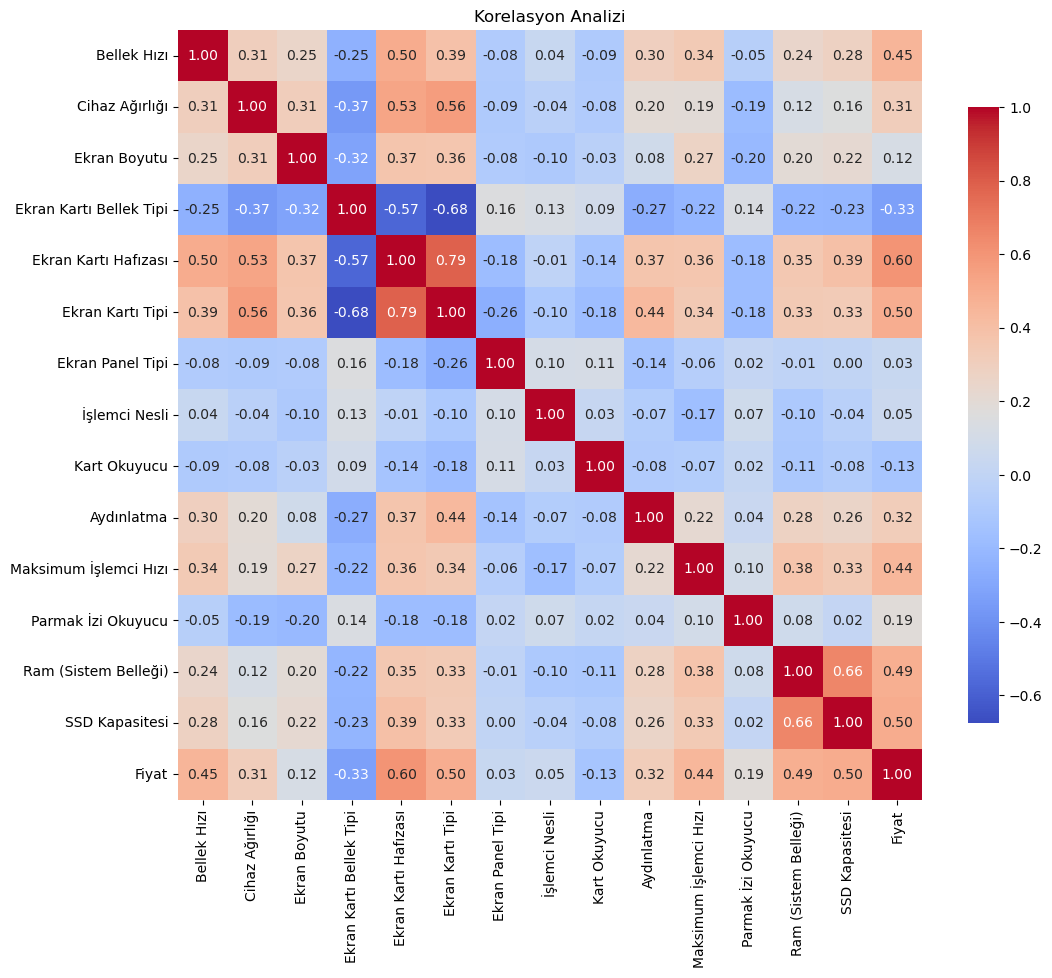

In [16]:
def corr_data_visual(data):
    # Isı haritasının boyutunu belirleme
    plt.figure(figsize=(12, 10))
    # Isı haritasını oluşturma ve metin özelliklerini ve renk çubuğu boyutunu özelleştirme
    sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f",
                cbar_kws={'shrink': 0.8}, annot_kws={'size': 10})
    plt.title('Korelasyon Analizi')
    plt.show()


corr_data_visual(data)

### DAĞILIMLARINI İNCELEYELİM:

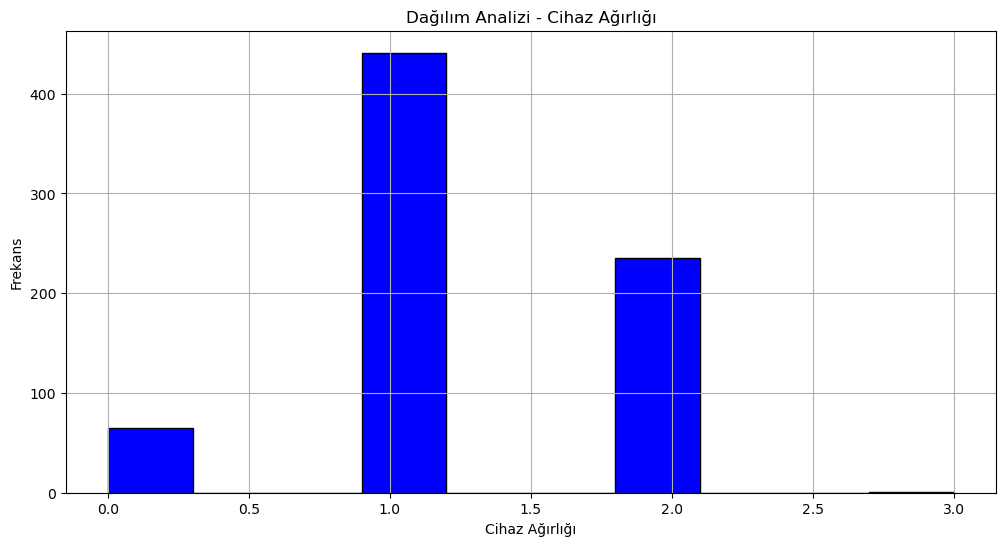

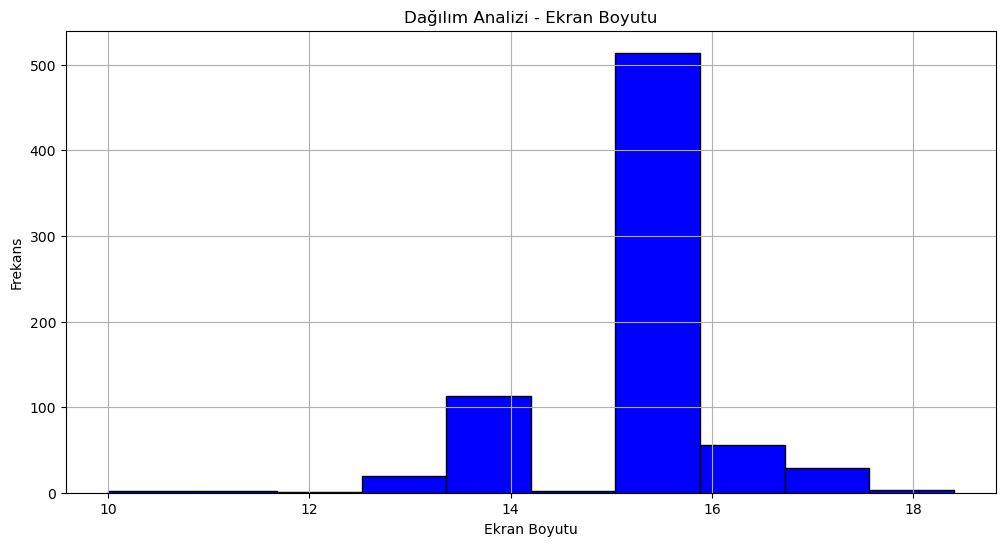

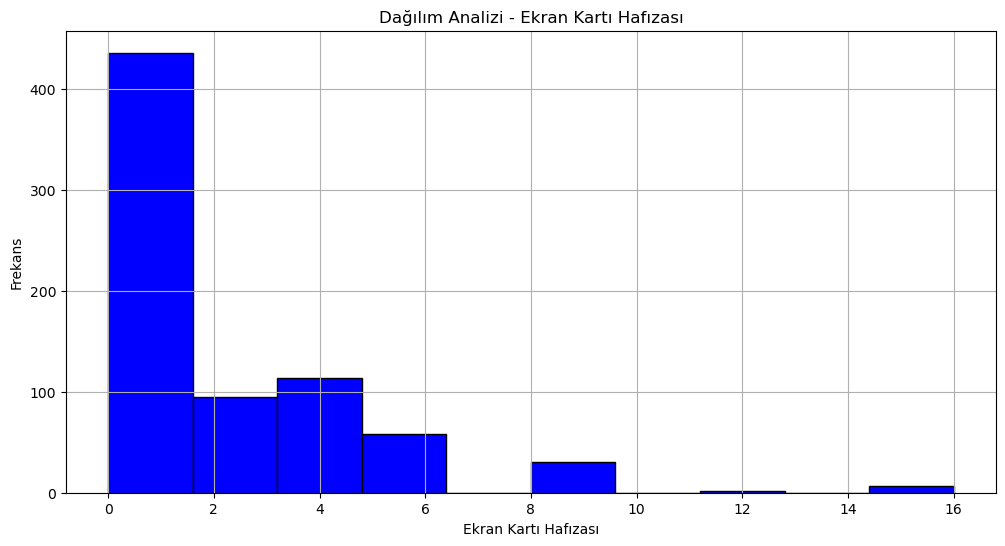

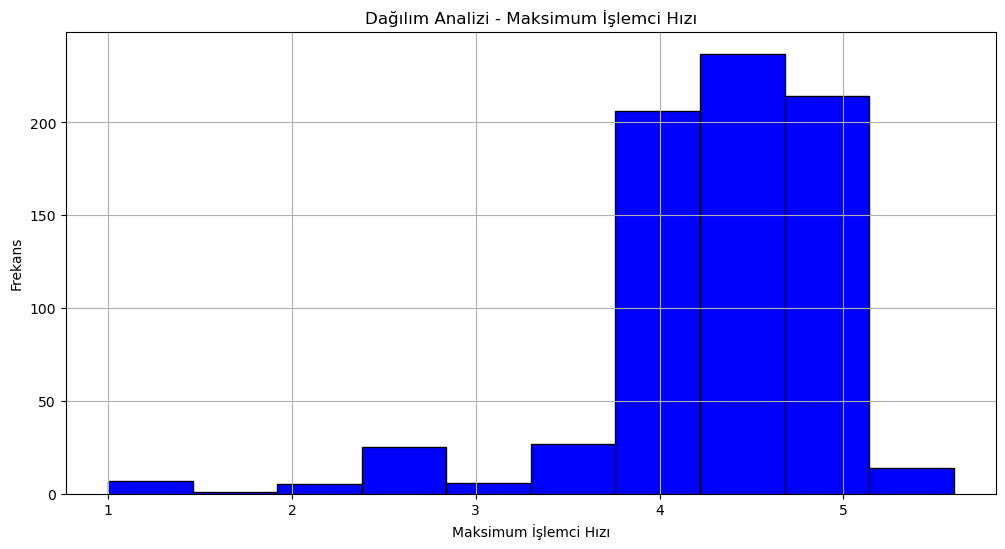

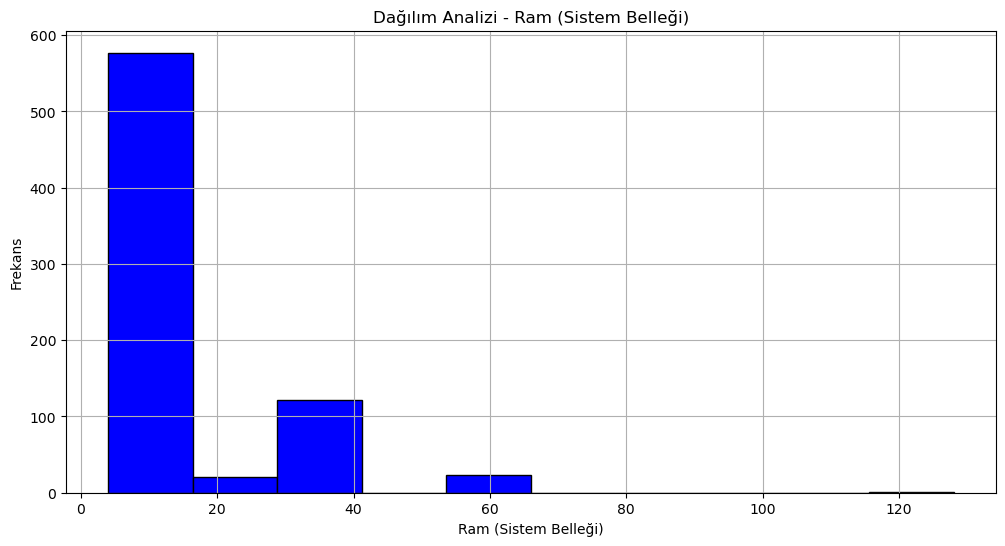

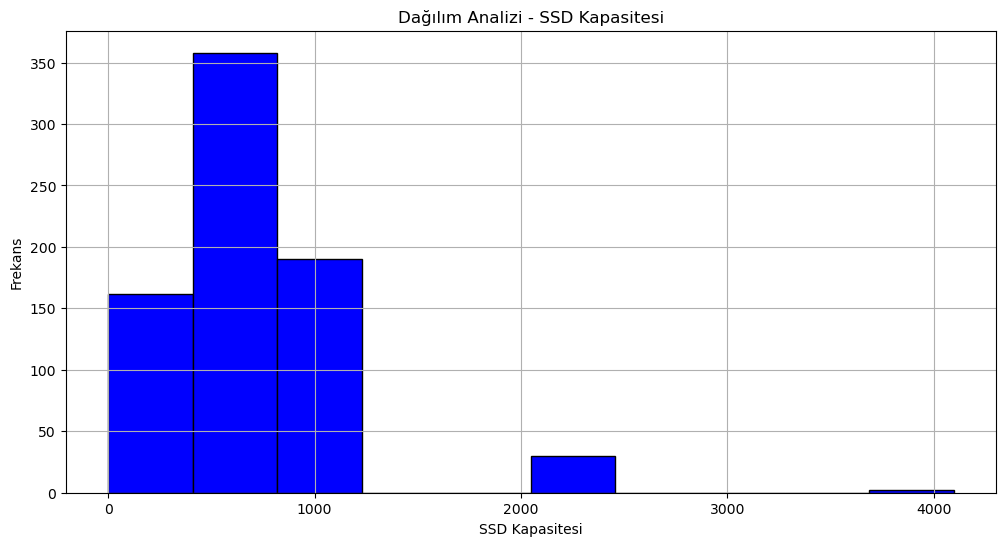

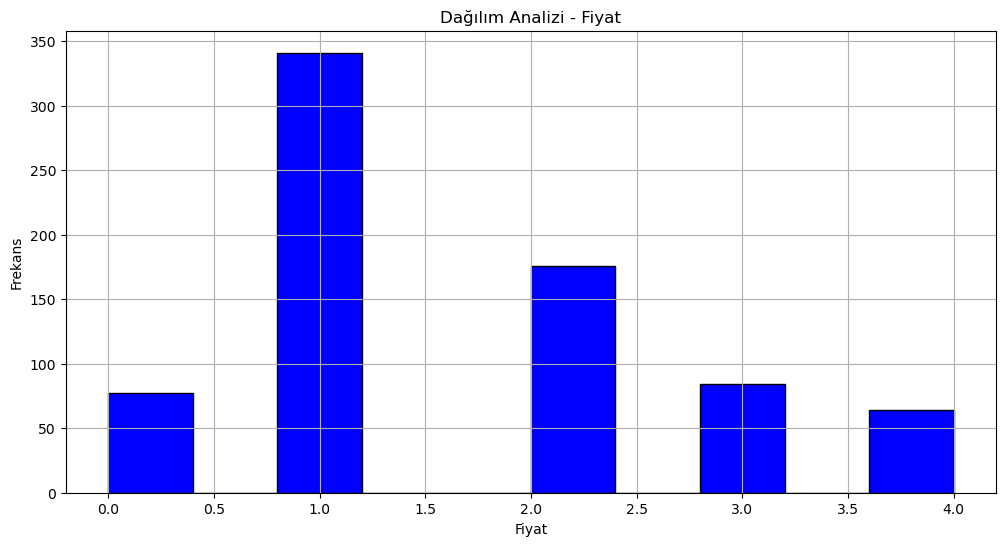

In [17]:
def dagilim_analizi(data):
    columns = ['Cihaz Ağırlığı', 'Ekran Boyutu', 'Ekran Kartı Hafızası', 'Maksimum İşlemci Hızı', 'Ram (Sistem Belleği)', 'SSD Kapasitesi', 'Fiyat']
    for column in columns:
        plt.figure(figsize=(12, 6))
        plt.hist(data[column], bins=10, color='blue', edgecolor='black')
        plt.title(f'Dağılım Analizi - {column}')
        plt.xlabel(column)
        plt.ylabel('Frekans')
        plt.grid(True)
        plt.show()

dagilim_analizi(data)

### KATEGORİLERİ İNCELEYELİM

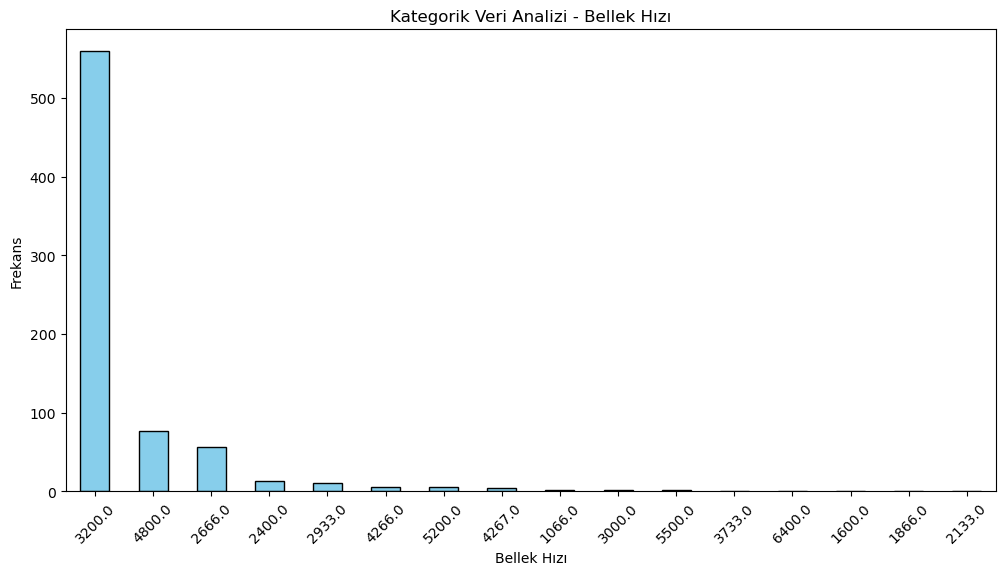

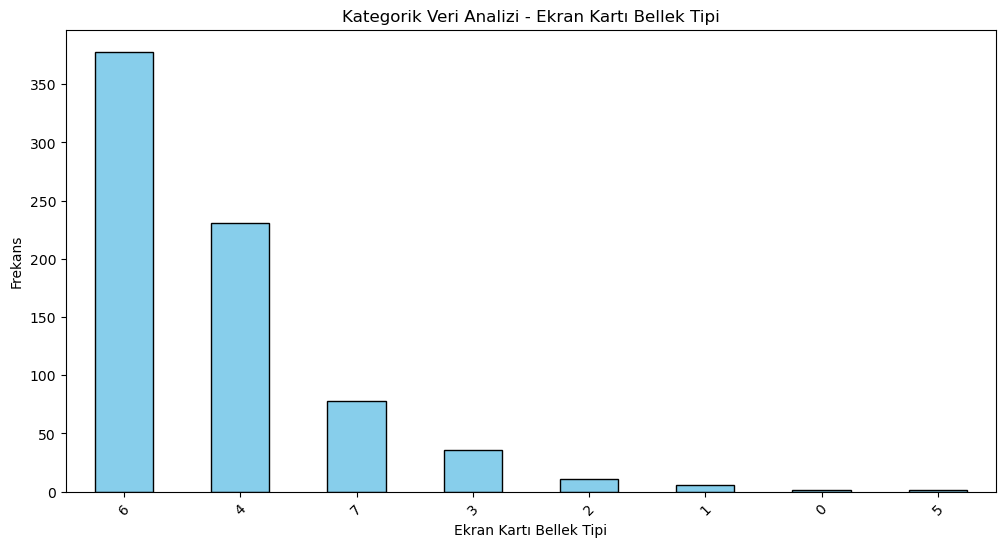

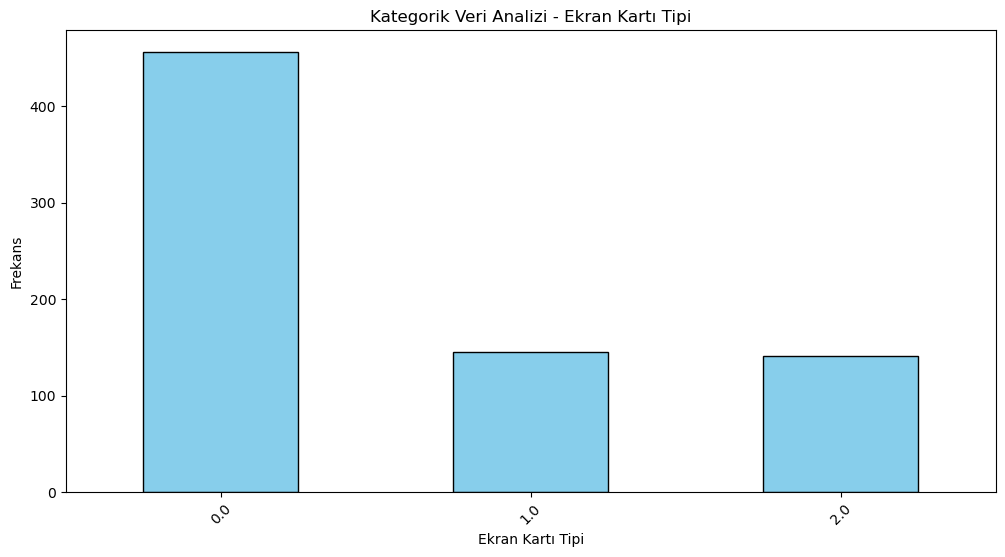

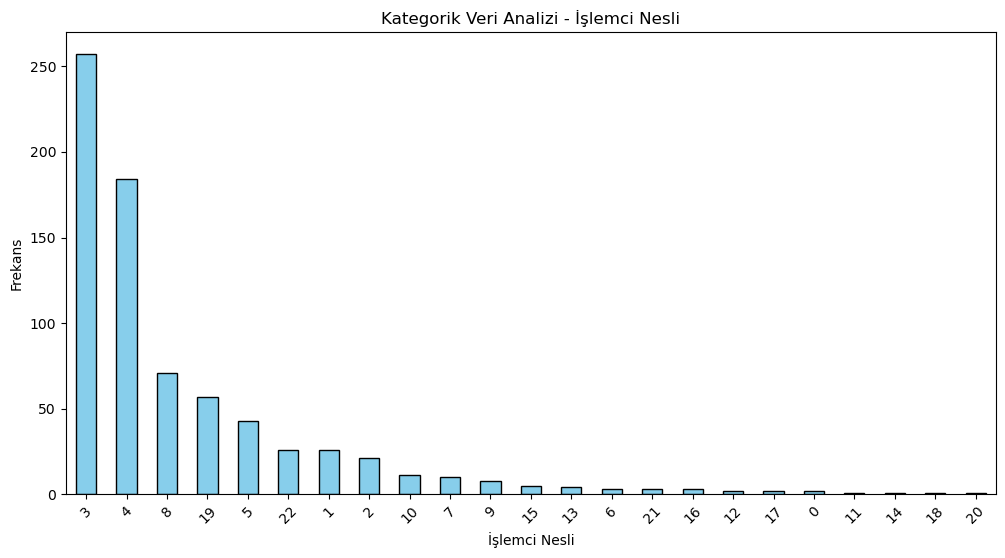

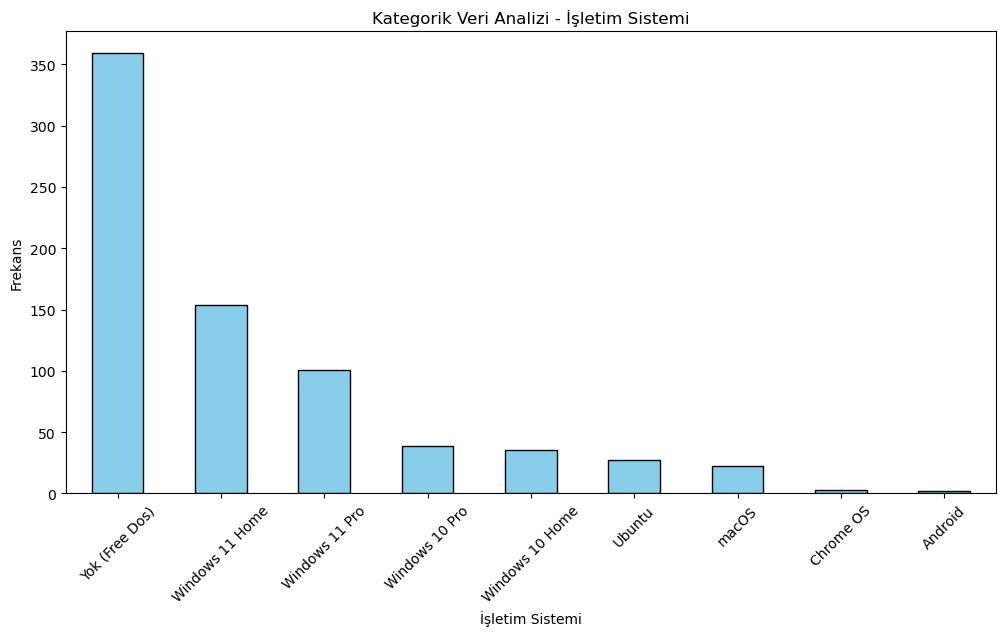

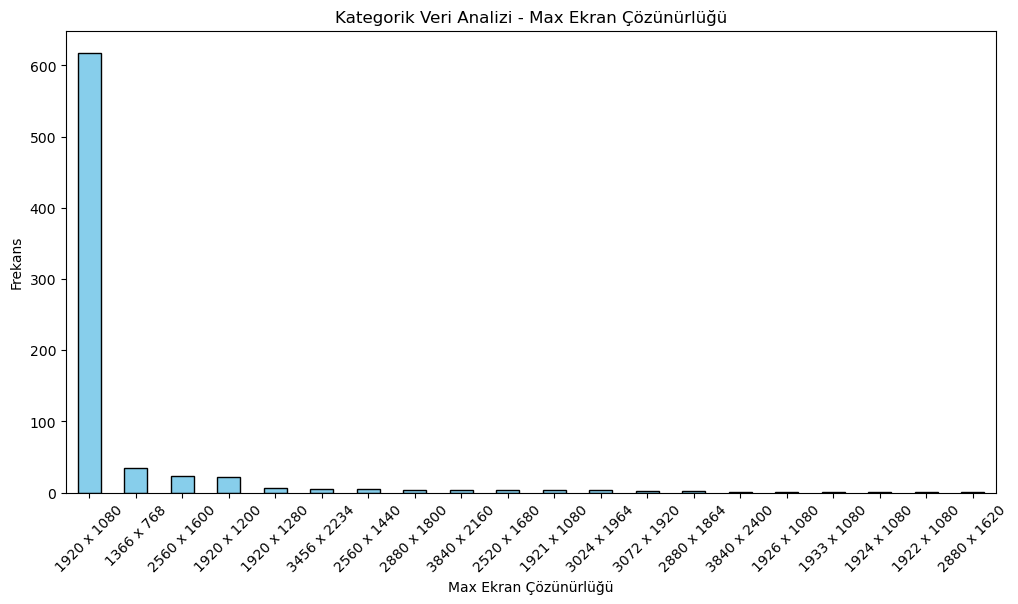

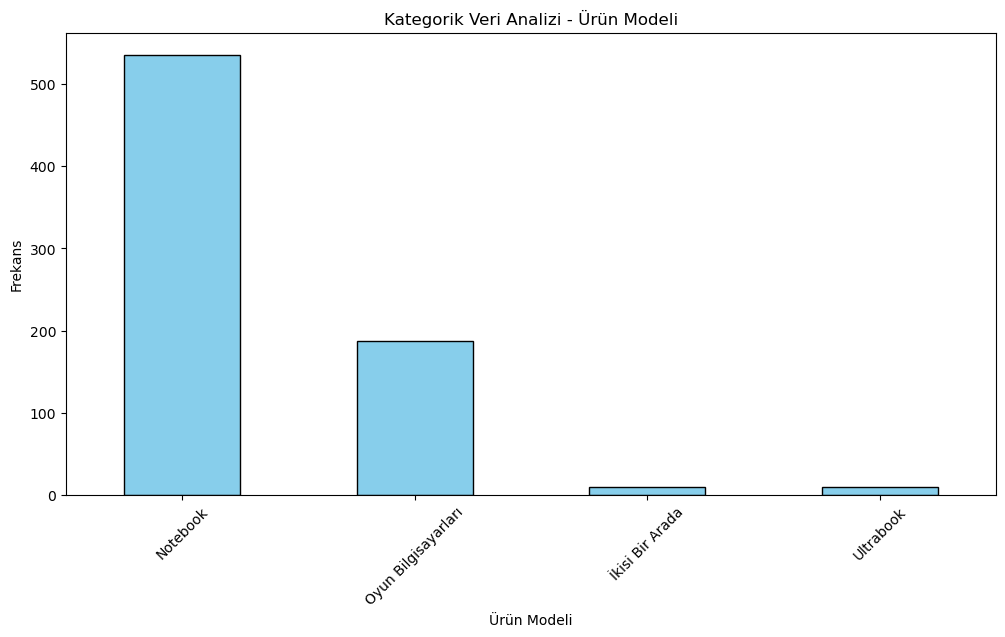

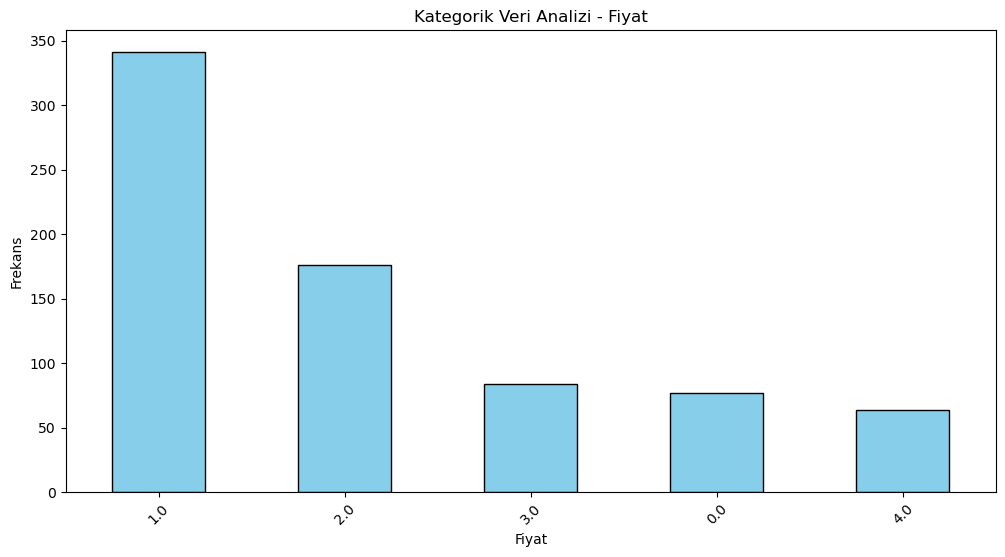

In [18]:
def kategori_analizi(data):
    columns = ['Bellek Hızı', 'Ekran Kartı Bellek Tipi', 'Ekran Kartı Tipi', 'İşlemci Nesli', 'İşletim Sistemi', 'Max Ekran Çözünürlüğü', 'Ürün Modeli', 'Fiyat']
    for column in columns:
        plt.figure(figsize=(12, 6))
        data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Kategorik Veri Analizi - {column}')
        plt.xlabel(column)
        plt.ylabel('Frekans')
        plt.xticks(rotation=45)  # Eksen etiketlerini döndür
        plt.show()
kategori_analizi(data)

### FİYAT ANALİZİ YAPALIM:

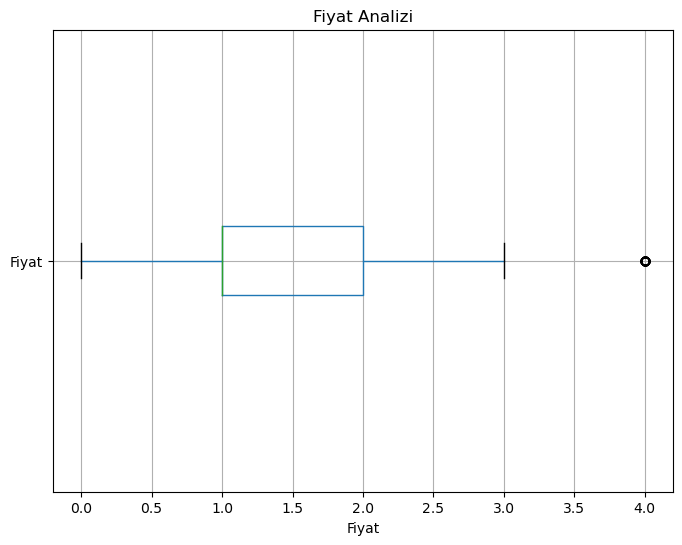

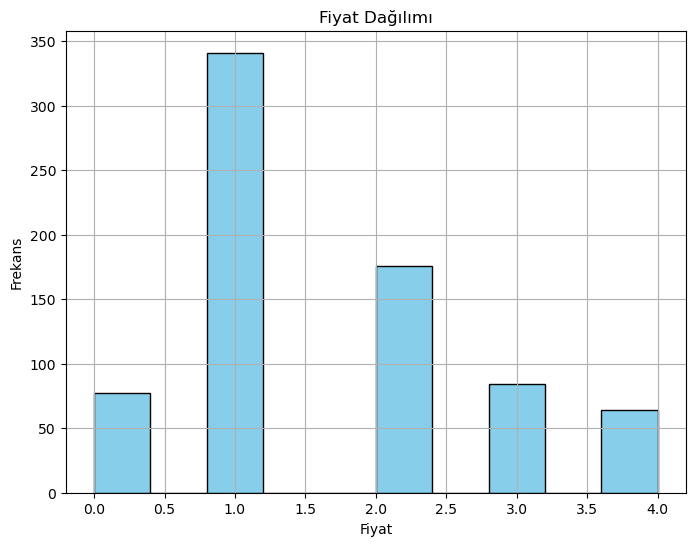

In [19]:
def fiyat_analizi(data):
    # Fiyat analizi için kutu grafik
    plt.figure(figsize=(8, 6))
    data.boxplot(column='Fiyat', vert=False)
    plt.title('Fiyat Analizi')
    plt.xlabel('Fiyat')
    plt.show()

    # Fiyat dağılımı için histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data['Fiyat'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Fiyat Dağılımı')
    plt.xlabel('Fiyat')
    plt.ylabel('Frekans')
    plt.grid(True)
    plt.show()

fiyat_analizi(data)

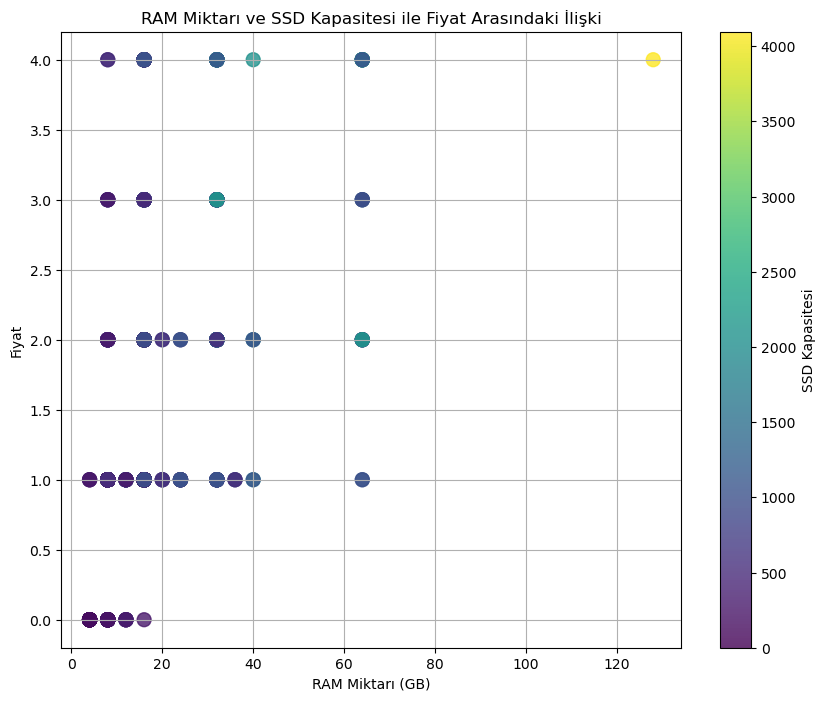

In [20]:
def ssd_and_ram_price_analysis(data):
    # SSD kapasitesi ve RAM miktarı ile fiyat arasındaki ilişkiyi gösteren saçılım grafiği
    plt.figure(figsize=(10, 8))
    plt.scatter(data['Ram (Sistem Belleği)'], data['Fiyat'], c=data['SSD Kapasitesi'], cmap='viridis', s=100, alpha=0.8)
    plt.colorbar(label='SSD Kapasitesi')
    plt.title('RAM Miktarı ve SSD Kapasitesi ile Fiyat Arasındaki İlişki')
    plt.xlabel('RAM Miktarı (GB)')
    plt.ylabel('Fiyat')
    plt.grid(True)
    plt.show()
ssd_and_ram_price_analysis(data)

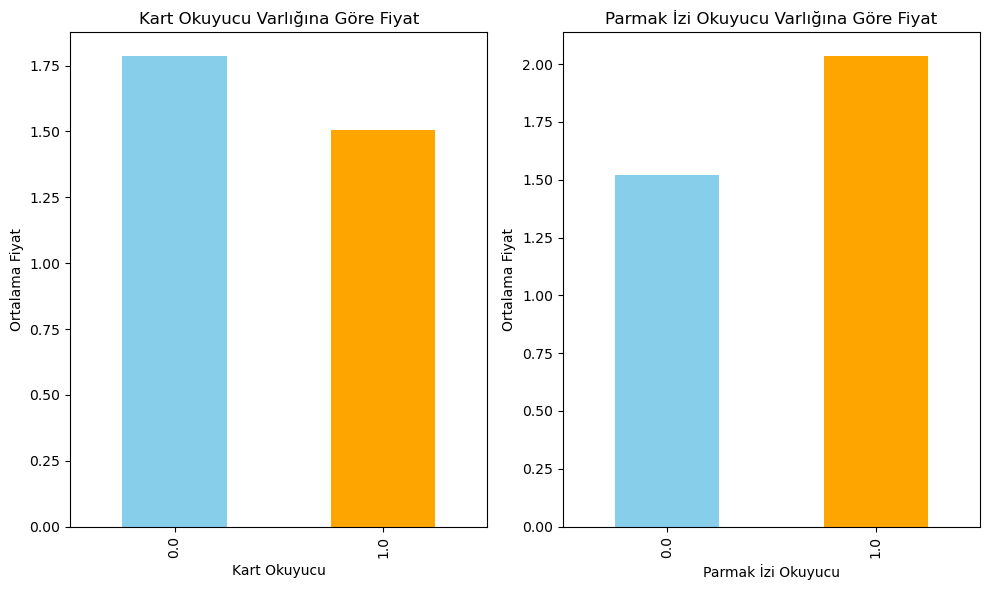

In [21]:
def parmak_kart_okuyucularin_fiyata_etki_analizi(df):
    # Kart okuyucu ve parmak izi okuyucu varlığına göre fiyat analizi
    plt.figure(figsize=(10, 6))

    # Kart Okuyucu Var/Yok'a göre fiyat karşılaştırması
    plt.subplot(1, 2, 1)
    df.groupby('Kart Okuyucu')['Fiyat'].mean().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title('Kart Okuyucu Varlığına Göre Fiyat')
    plt.xlabel('Kart Okuyucu')
    plt.ylabel('Ortalama Fiyat')

    # Parmak İzi Okuyucu Var/Yok'a göre fiyat karşılaştırması
    plt.subplot(1, 2, 2)
    df.groupby('Parmak İzi Okuyucu')['Fiyat'].mean().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title('Parmak İzi Okuyucu Varlığına Göre Fiyat')
    plt.xlabel('Parmak İzi Okuyucu')
    plt.ylabel('Ortalama Fiyat')

    plt.tight_layout()
    plt.show()

parmak_kart_okuyucularin_fiyata_etki_analizi(data)

<Figure size 800x600 with 0 Axes>

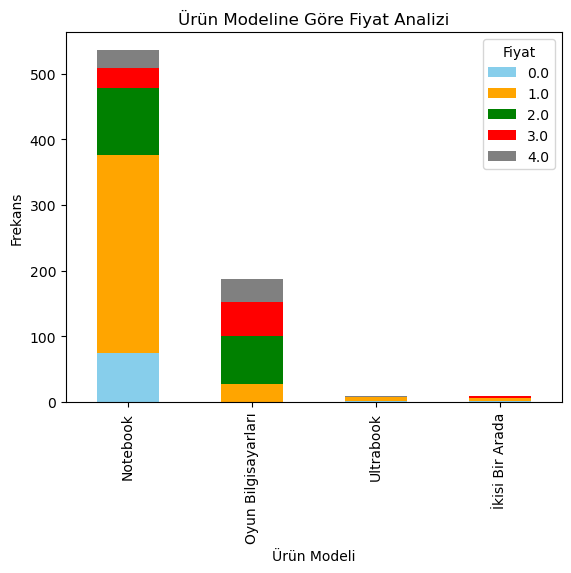

In [22]:
def urun_tipi_fiyat_analizi(df):
    plt.figure(figsize=(8, 6))
    df.groupby(['Ürün Modeli', 'Fiyat']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'green', 'red', 'gray'])
    plt.title('Ürün Modeline Göre Fiyat Analizi')
    plt.xlabel('Ürün Modeli')
    plt.ylabel('Frekans')
    plt.legend(title='Fiyat')
    plt.show()

urun_tipi_fiyat_analizi(data)

### BAZI DEĞİŞKENLERİN ÜRÜNÜN TİPİNE ETKİLERİNİ İNCELEYELİM

<Figure size 800x600 with 0 Axes>

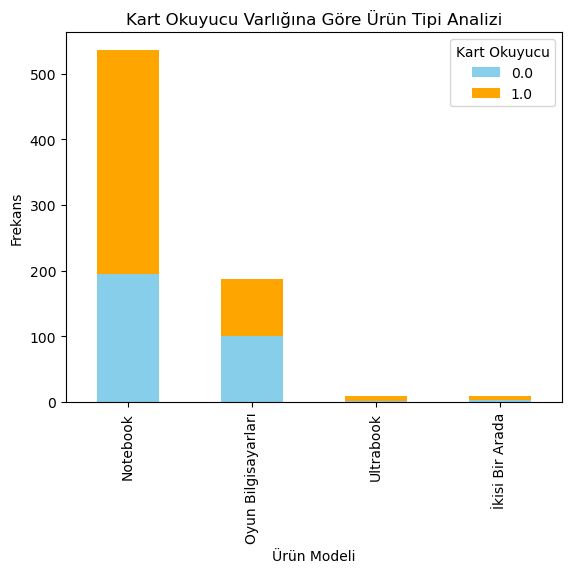

In [23]:
def kart_okuyucu_urun_tipi_iliski(df):
    # Kart okuyucu varlığına göre ürün tipi analizi
    plt.figure(figsize=(8, 6))
    df.groupby(['Ürün Modeli', 'Kart Okuyucu']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
    plt.title('Kart Okuyucu Varlığına Göre Ürün Tipi Analizi')
    plt.xlabel('Ürün Modeli')
    plt.ylabel('Frekans')
    plt.legend(title='Kart Okuyucu')
    plt.show()

kart_okuyucu_urun_tipi_iliski(data)

### İŞLEMCİ NESLİ İLE MAKSİMUM İŞLEMCİ HIZI İLİŞKİSİNİ İNCELEYELİM:

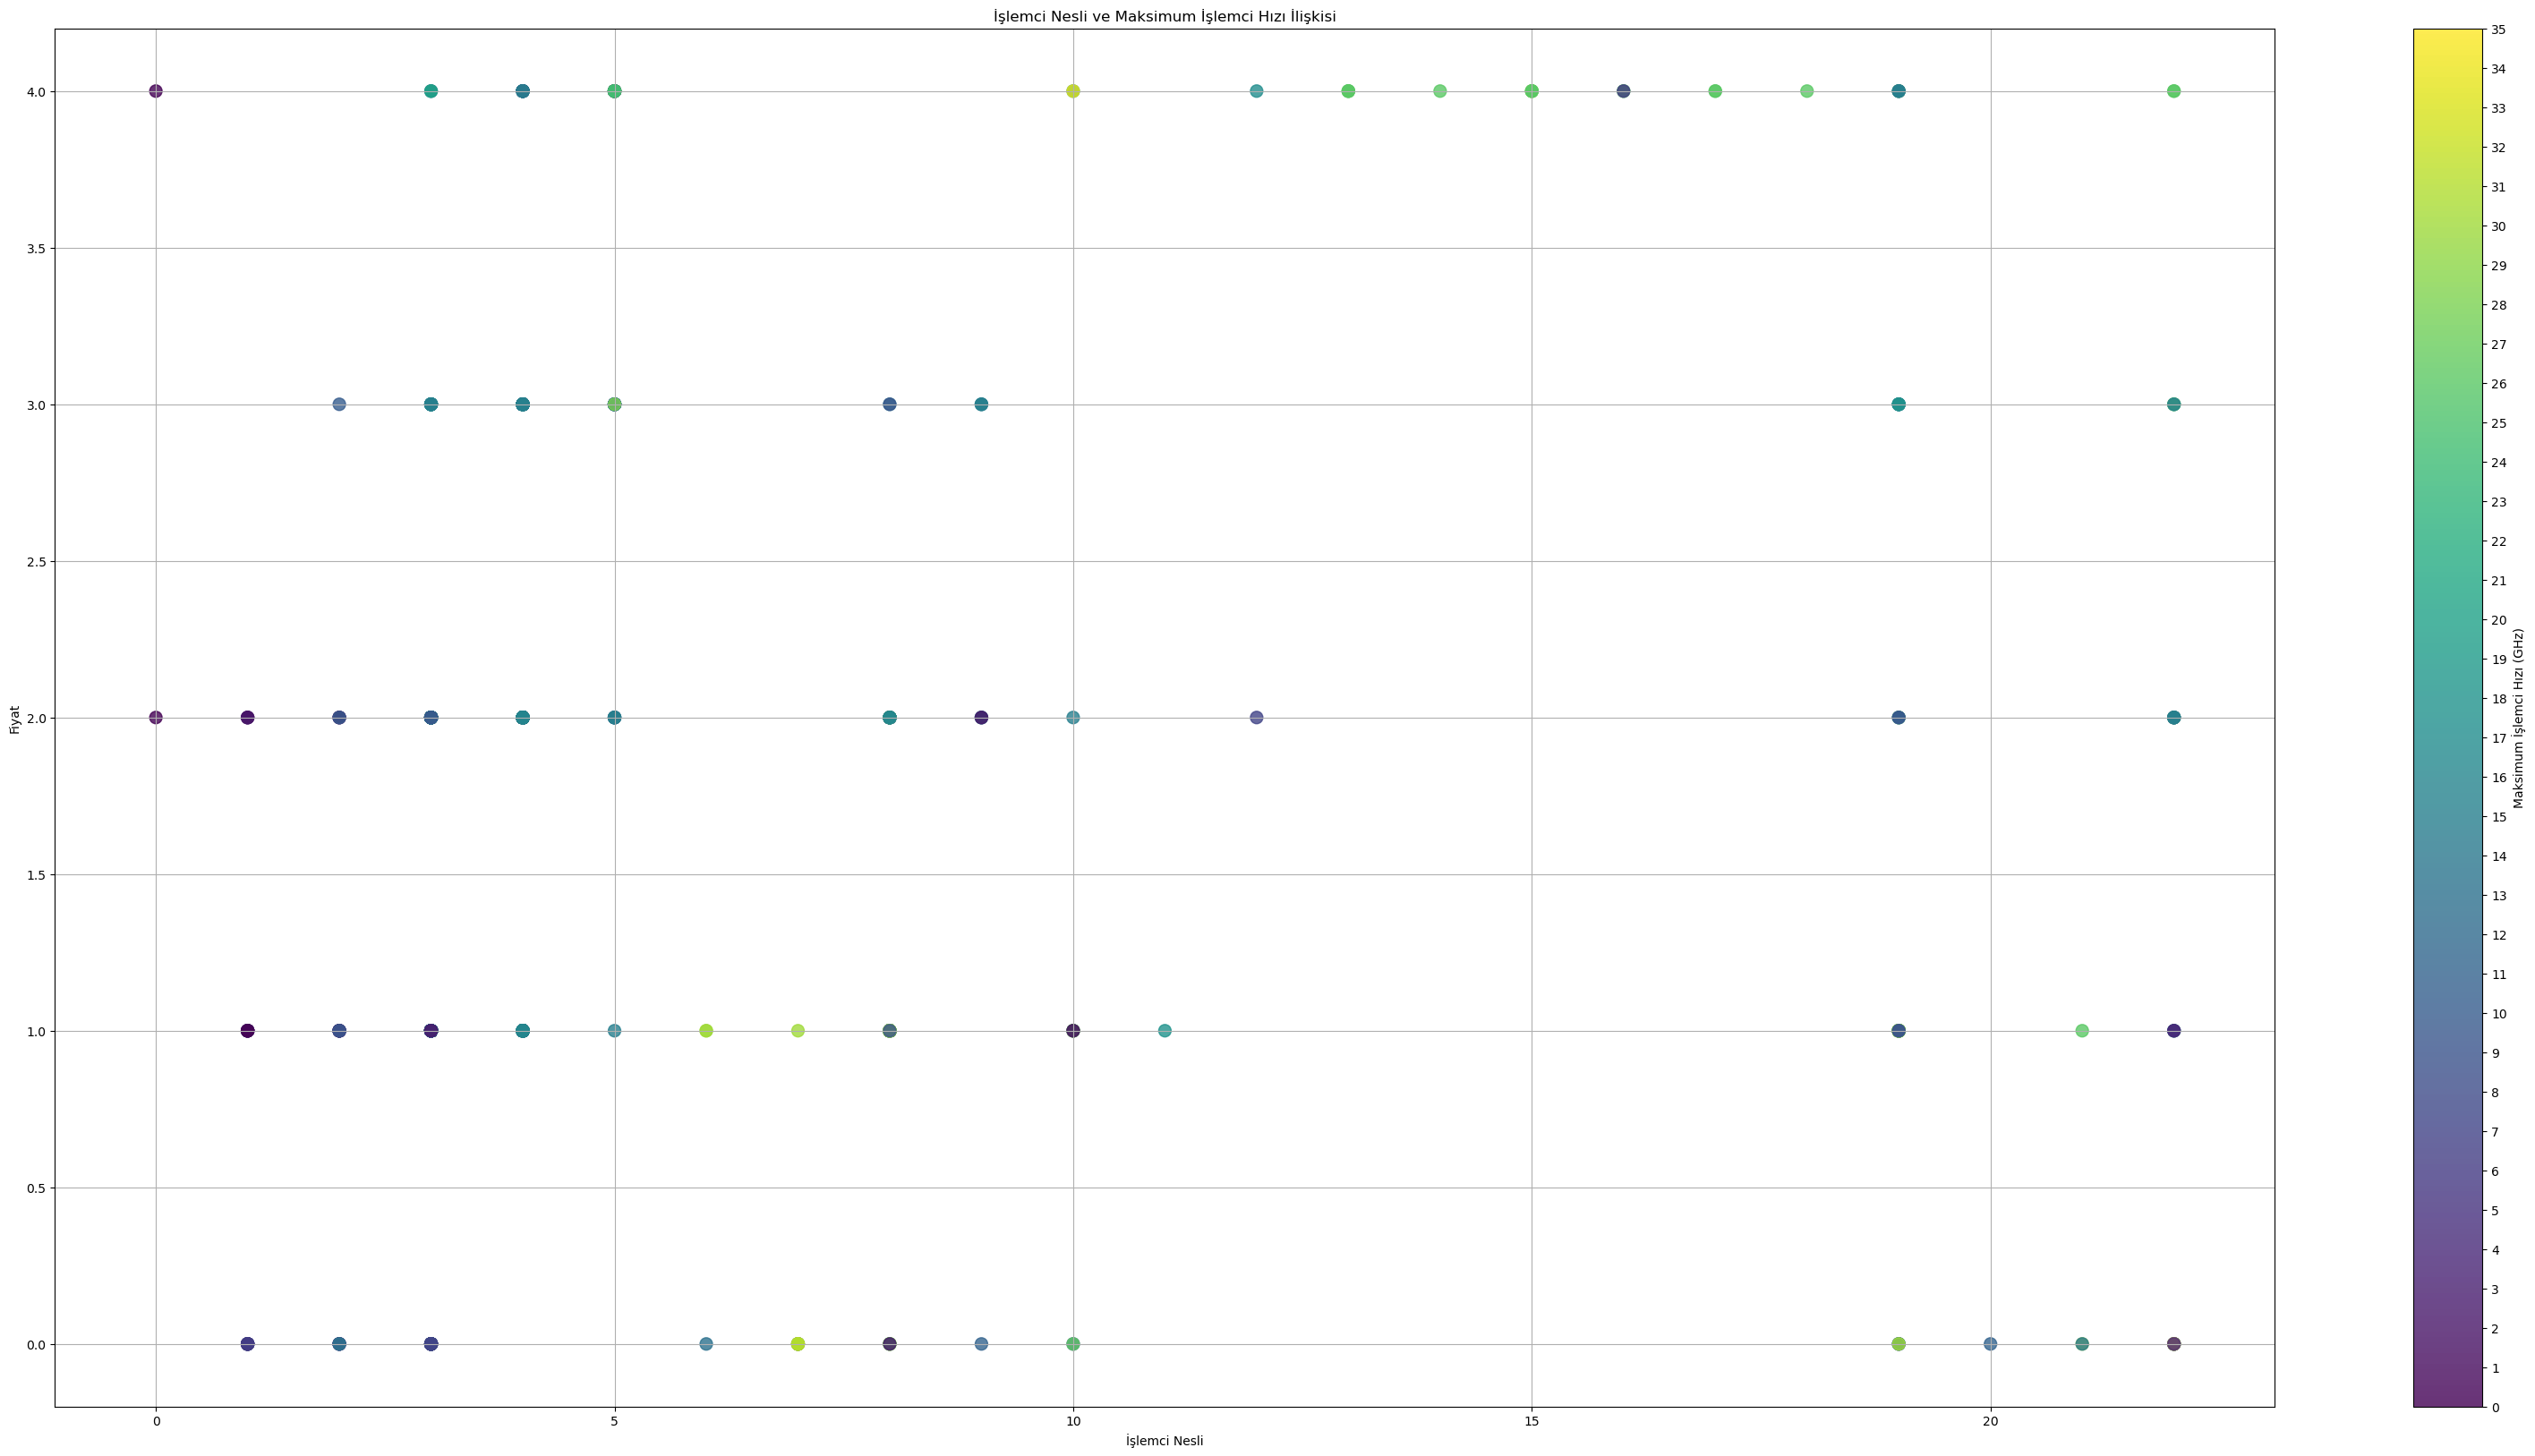

In [24]:
def islemci_ve_hiz_iliski(df):
    # İşlemci nesli ve maksimum işlemci hızı arasındaki ilişkiyi gösteren saçılım grafiği
    plt.figure(figsize=(40, 20))
    scatter = plt.scatter(df['İşlemci Nesli'], df['Fiyat'], c=pd.factorize(df['Maksimum İşlemci Hızı'])[0], cmap='viridis', s=100, alpha=0.8)
    plt.colorbar(ticks=range(len(df['Maksimum İşlemci Hızı'].unique())), label='Maksimum İşlemci Hızı (GHz)')
    plt.title('İşlemci Nesli ve Maksimum İşlemci Hızı İlişkisi')
    plt.xlabel('İşlemci Nesli')
    plt.ylabel('Fiyat')
    plt.grid(True)
    plt.show()

islemci_ve_hiz_iliski(data)

## ML ALGORİTMALARI İLE FİYAT TAHMİNLENMESİ YAPILMASI İÇİN ML AGORİTMASI SEÇİMİ

In [25]:
y=data["Fiyat"]
columns_to_drop = [ "Ekran Kartı Bellek Tipi","Ekran Kartı Tipi","İşlemci", 
                    "İşletim Sistemi", "Max Ekran Çözünürlüğü", "Ürün Modeli","Fiyat" ]
X=data.drop(columns=columns_to_drop, axis=1)
#normalizasyon ile veriyi ölçeklendiririz.Daha iyi performans sağlarız
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)



In [26]:
#destek vektör makinesi %70 verdi
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
svm=SVC(kernel="rbf",random_state=42)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Test seti doğruluk oranı:{accuracy: .2f}")
print(classification_report(y_test,y_pred))
#precision gerçekten doğru olan ifadelerin ne kadar doğru ifade ettiğini gösterir
#recall= duyarlılık ne kadarının doğru bir şekilde tahmin edildiğini söyler
#f1 score=hassasiyet ve duyarlığın harmonik ortalamasından oluşur
#doğruluk(accuracy)= test setindeki tüm örneklerin doğru bir şekilde sınıflandırılma yüzdesidir.
#support : 0 kısmında denk gelen ne akdar pozitif tahminde bulunma,ne kadar yanlış tahminde bulunulmuş bunların gösterimidir

Test seti doğruluk oranı: 0.70
              precision    recall  f1-score   support

         0.0       0.71      0.38      0.50        13
         1.0       0.70      0.93      0.80        67
         2.0       0.74      0.57      0.64        44
         3.0       0.55      0.43      0.48        14
         4.0       0.67      0.55      0.60        11

    accuracy                           0.70       149
   macro avg       0.67      0.57      0.60       149
weighted avg       0.70      0.70      0.68       149



In [27]:
#karar ağacı
from sklearn.tree import DecisionTreeClassifier
#karar ağacı modeli oluşturma ve eğitme
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
#test seti üzerinde performans değerlendirilmesi
y_pred_dt=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print(f"karar ağacı için test seti doğruluk oranı: {accuracy_dt: .2f}")
print(classification_report(y_test,y_pred_dt))

karar ağacı için test seti doğruluk oranı:  0.68
              precision    recall  f1-score   support

         0.0       0.53      0.62      0.57        13
         1.0       0.70      0.78      0.74        67
         2.0       0.70      0.52      0.60        44
         3.0       0.56      0.64      0.60        14
         4.0       0.82      0.82      0.82        11

    accuracy                           0.68       149
   macro avg       0.66      0.68      0.66       149
weighted avg       0.68      0.68      0.67       149



In [28]:
#rastgele orman
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f"Rastgele ormanlar için test seti doğruluk orani:{accuracy_rf: .2f}")
print(classification_report(y_test,y_pred_rf))

Rastgele ormanlar için test seti doğruluk orani: 0.80
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        13
         1.0       0.79      0.94      0.86        67
         2.0       0.81      0.66      0.73        44
         3.0       0.67      0.57      0.62        14
         4.0       0.89      0.73      0.80        11

    accuracy                           0.80       149
   macro avg       0.81      0.75      0.78       149
weighted avg       0.80      0.80      0.79       149



In [29]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
print(f"KNN için test seti doğruluk orani:{accuracy_knn: .2f}")
print(classification_report(y_test,y_pred_knn))

KNN için test seti doğruluk orani: 0.60
              precision    recall  f1-score   support

         0.0       0.58      0.54      0.56        13
         1.0       0.68      0.91      0.78        67
         2.0       0.52      0.36      0.43        44
         3.0       0.17      0.14      0.15        14
         4.0       1.00      0.36      0.53        11

    accuracy                           0.60       149
   macro avg       0.59      0.46      0.49       149
weighted avg       0.60      0.60      0.58       149



In [30]:
#YSA 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
mlpc=MLPClassifier(max_iter=4000).fit(X_train,y_train)
y_pred_ysa=mlpc.predict(X_test)
accuracy_ysa=accuracy_score(y_test,y_pred_ysa)
print(f"YSA için test seti doğruluk orani:{accuracy_ysa: .2f}")
print(classification_report(y_test,y_pred_ysa))

YSA için test seti doğruluk orani: 0.70
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        13
         1.0       0.79      0.90      0.84        67
         2.0       0.70      0.64      0.67        44
         3.0       0.31      0.29      0.30        14
         4.0       0.50      0.36      0.42        11

    accuracy                           0.70       149
   macro avg       0.61      0.57      0.59       149
weighted avg       0.69      0.70      0.70       149



In [31]:
# Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier

gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

y_pred_gbm=gbm_model.predict(X_test)

accuracy_gbm=accuracy_score(y_test,y_pred_gbm)
print(f"Gradient Boosting Machines için test seti doğruluk orani:{accuracy_gbm: .2f}")
print(classification_report(y_test,y_pred_gbm))

Gradient Boosting Machines için test seti doğruluk orani: 0.77
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.77      0.96      0.85        67
         2.0       0.73      0.55      0.62        44
         3.0       0.60      0.43      0.50        14
         4.0       0.82      0.82      0.82        11

    accuracy                           0.77       149
   macro avg       0.78      0.73      0.75       149
weighted avg       0.77      0.77      0.76       149



In [32]:
from catboost import CatBoostClassifier

cat_model=CatBoostClassifier().fit(X_train,y_train)
y_pred_cat=cat_model.predict(X_test)
accuracy_cat=accuracy_score(y_test,y_pred_cat)
print(f"Cat Boost için test seti doğruluk orani:{accuracy_cat: .2f}")
print(classification_report(y_test,y_pred_cat))

Learning rate set to 0.077046
0:	learn: 1.5233188	total: 157ms	remaining: 2m 36s
1:	learn: 1.4566243	total: 158ms	remaining: 1m 18s
2:	learn: 1.4030436	total: 159ms	remaining: 52.8s
3:	learn: 1.3487974	total: 160ms	remaining: 39.8s
4:	learn: 1.2940383	total: 161ms	remaining: 32s
5:	learn: 1.2610985	total: 162ms	remaining: 26.8s
6:	learn: 1.2158329	total: 163ms	remaining: 23.1s
7:	learn: 1.1792456	total: 164ms	remaining: 20.3s
8:	learn: 1.1512947	total: 165ms	remaining: 18.1s
9:	learn: 1.1173305	total: 166ms	remaining: 16.4s
10:	learn: 1.0915051	total: 167ms	remaining: 15s
11:	learn: 1.0636300	total: 168ms	remaining: 13.8s
12:	learn: 1.0414728	total: 169ms	remaining: 12.8s
13:	learn: 1.0196150	total: 169ms	remaining: 11.9s
14:	learn: 1.0011602	total: 170ms	remaining: 11.2s
15:	learn: 0.9794438	total: 171ms	remaining: 10.5s
16:	learn: 0.9629543	total: 172ms	remaining: 9.95s
17:	learn: 0.9432780	total: 173ms	remaining: 9.44s
18:	learn: 0.9299978	total: 174ms	remaining: 8.99s
19:	learn: 0.

249:	learn: 0.3254488	total: 385ms	remaining: 1.16s
250:	learn: 0.3241575	total: 386ms	remaining: 1.15s
251:	learn: 0.3234135	total: 387ms	remaining: 1.15s
252:	learn: 0.3225948	total: 388ms	remaining: 1.15s
253:	learn: 0.3214814	total: 389ms	remaining: 1.14s
254:	learn: 0.3210150	total: 390ms	remaining: 1.14s
255:	learn: 0.3205567	total: 391ms	remaining: 1.14s
256:	learn: 0.3202054	total: 392ms	remaining: 1.13s
257:	learn: 0.3190387	total: 393ms	remaining: 1.13s
258:	learn: 0.3180947	total: 394ms	remaining: 1.13s
259:	learn: 0.3177514	total: 395ms	remaining: 1.12s
260:	learn: 0.3169695	total: 396ms	remaining: 1.12s
261:	learn: 0.3159705	total: 397ms	remaining: 1.12s
262:	learn: 0.3153262	total: 398ms	remaining: 1.11s
263:	learn: 0.3148984	total: 399ms	remaining: 1.11s
264:	learn: 0.3141094	total: 400ms	remaining: 1.11s
265:	learn: 0.3128363	total: 401ms	remaining: 1.11s
266:	learn: 0.3124730	total: 402ms	remaining: 1.1s
267:	learn: 0.3117637	total: 403ms	remaining: 1.1s
268:	learn: 0.

443:	learn: 0.2268676	total: 574ms	remaining: 719ms
444:	learn: 0.2266134	total: 576ms	remaining: 718ms
445:	learn: 0.2261980	total: 577ms	remaining: 717ms
446:	learn: 0.2258922	total: 578ms	remaining: 715ms
447:	learn: 0.2256756	total: 579ms	remaining: 713ms
448:	learn: 0.2253561	total: 580ms	remaining: 712ms
449:	learn: 0.2248779	total: 581ms	remaining: 711ms
450:	learn: 0.2246770	total: 582ms	remaining: 709ms
451:	learn: 0.2242730	total: 583ms	remaining: 707ms
452:	learn: 0.2239518	total: 585ms	remaining: 706ms
453:	learn: 0.2237746	total: 586ms	remaining: 704ms
454:	learn: 0.2234141	total: 586ms	remaining: 702ms
455:	learn: 0.2230366	total: 588ms	remaining: 701ms
456:	learn: 0.2226118	total: 589ms	remaining: 700ms
457:	learn: 0.2223538	total: 590ms	remaining: 698ms
458:	learn: 0.2220240	total: 591ms	remaining: 697ms
459:	learn: 0.2216171	total: 593ms	remaining: 696ms
460:	learn: 0.2213186	total: 594ms	remaining: 694ms
461:	learn: 0.2208047	total: 595ms	remaining: 692ms
462:	learn: 

607:	learn: 0.1821343	total: 757ms	remaining: 488ms
608:	learn: 0.1818876	total: 758ms	remaining: 486ms
609:	learn: 0.1815204	total: 759ms	remaining: 485ms
610:	learn: 0.1812404	total: 760ms	remaining: 484ms
611:	learn: 0.1810010	total: 761ms	remaining: 482ms
612:	learn: 0.1808301	total: 762ms	remaining: 481ms
613:	learn: 0.1806173	total: 763ms	remaining: 480ms
614:	learn: 0.1804715	total: 764ms	remaining: 478ms
615:	learn: 0.1800838	total: 765ms	remaining: 477ms
616:	learn: 0.1797403	total: 765ms	remaining: 475ms
617:	learn: 0.1795756	total: 767ms	remaining: 474ms
618:	learn: 0.1794094	total: 768ms	remaining: 473ms
619:	learn: 0.1792841	total: 769ms	remaining: 471ms
620:	learn: 0.1790989	total: 770ms	remaining: 470ms
621:	learn: 0.1788987	total: 771ms	remaining: 469ms
622:	learn: 0.1787143	total: 772ms	remaining: 467ms
623:	learn: 0.1784919	total: 773ms	remaining: 466ms
624:	learn: 0.1782148	total: 774ms	remaining: 464ms
625:	learn: 0.1780029	total: 775ms	remaining: 463ms
626:	learn: 

818:	learn: 0.1472307	total: 945ms	remaining: 209ms
819:	learn: 0.1470500	total: 946ms	remaining: 208ms
820:	learn: 0.1468463	total: 947ms	remaining: 206ms
821:	learn: 0.1467302	total: 947ms	remaining: 205ms
822:	learn: 0.1466414	total: 948ms	remaining: 204ms
823:	learn: 0.1464782	total: 949ms	remaining: 203ms
824:	learn: 0.1463547	total: 950ms	remaining: 202ms
825:	learn: 0.1463186	total: 951ms	remaining: 200ms
826:	learn: 0.1462214	total: 952ms	remaining: 199ms
827:	learn: 0.1460626	total: 953ms	remaining: 198ms
828:	learn: 0.1459563	total: 954ms	remaining: 197ms
829:	learn: 0.1457754	total: 955ms	remaining: 196ms
830:	learn: 0.1456873	total: 956ms	remaining: 194ms
831:	learn: 0.1455537	total: 957ms	remaining: 193ms
832:	learn: 0.1454129	total: 958ms	remaining: 192ms
833:	learn: 0.1453332	total: 959ms	remaining: 191ms
834:	learn: 0.1452681	total: 960ms	remaining: 190ms
835:	learn: 0.1451383	total: 961ms	remaining: 188ms
836:	learn: 0.1450204	total: 962ms	remaining: 187ms
837:	learn: 

Cat Boost için test seti doğruluk orani: 0.77
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        13
         1.0       0.80      0.91      0.85        67
         2.0       0.78      0.64      0.70        44
         3.0       0.50      0.57      0.53        14
         4.0       0.89      0.73      0.80        11

    accuracy                           0.77       149
   macro avg       0.74      0.71      0.72       149
weighted avg       0.77      0.77      0.76       149



In [33]:
model_scores = {
    "SVM" : accuracy,
    "Decision Tree" : accuracy_dt,
    "Random Forest" : accuracy_rf,
    "k-nn" : accuracy_knn,
    "ysa" : accuracy_ysa,
    "Gradient Boosting Machine" : accuracy_gbm,
    "Cat Boost" : accuracy_cat
}

df_scores = pd.DataFrame(list(model_scores.items()),columns=["Model","Test Seti Doğruluk Skoru"])

df_scores = df_scores.sort_values(by="Test Seti Doğruluk Skoru",ascending=False)

print(df_scores)

                       Model  Test Seti Doğruluk Skoru
2              Random Forest                  0.798658
5  Gradient Boosting Machine                  0.771812
6                  Cat Boost                  0.765101
4                        ysa                  0.704698
0                        SVM                  0.697987
1              Decision Tree                  0.677852
3                       k-nn                  0.604027


##  RANDOM FOREST VE GRADIENT BOOSTING MACHINES İÇİN MODEL TUNE İŞLEMELERİNİN YAPILMASI

#### RANDOM FOREST MODEL TUNİNG

In [34]:
rf_params={
    "max_depth": [2,5,8,10,12,14,16,18,20],
    "max_features": [2,5,8,10,12,14,16,18],
    "n_estimators": [10,500,1000],
    "min_samples_split": [2,5,10]
}

In [35]:
rf_model=RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

In [36]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': [2, 5, 8, 10, 12, 14, 16, 18],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [37]:
print("En iyi parametreler: "+str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 20, 'max_features': 18, 'min_samples_split': 10, 'n_estimators': 10}


In [42]:
rf_tuned = RandomForestClassifier(max_depth=20,
                                  max_features = 18, 
                                  min_samples_split = 10,
                                  n_estimators=10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=18, min_samples_split=10,
                       n_estimators=10)

In [41]:
y_pred_rf_model_tuning=rf_tuned.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf_model_tuning)
print(f"Rastgele ormanlar için test seti doğruluk orani:{accuracy_rf: .2f}")
print(classification_report(y_test,y_pred_rf_model_tuning))

Rastgele ormanlar için test seti doğruluk orani: 0.78
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        13
         1.0       0.79      0.93      0.86        67
         2.0       0.74      0.59      0.66        44
         3.0       0.56      0.64      0.60        14
         4.0       0.89      0.73      0.80        11

    accuracy                           0.78       149
   macro avg       0.80      0.75      0.77       149
weighted avg       0.78      0.78      0.77       149



#### Değişkenlerin Önem Düzeylerini İnceleyelim:

Text(0.5, 0, 'Değişken Önem Düzeyleri')

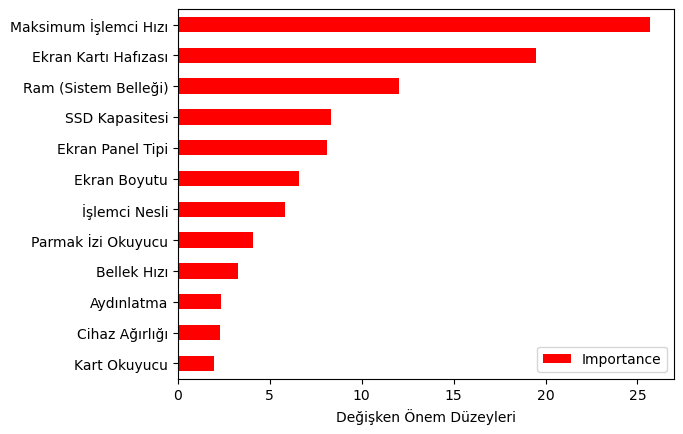

In [43]:
#değişken önem düzeyi
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index=X.columns)

importance.sort_values(by = "Importance",
                      axis = 0,
                      ascending=True).plot(kind="barh", color="r")
plt.xlabel("Değişken Önem Düzeyleri")

#### GBM MODEL TUNİNG

In [44]:
gbm_params = {"learning_rate" : [0.001,0.01,0.1,0.05],
            "n_estimators":[100,500,1000],
            "max_depth" : [3,5,10],
            "min_samples_split" : [2,5,10]}                

In [45]:
gbm=GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [46]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [47]:
print("En iyi parametreler: "+str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 1000}


In [48]:
gbm_model_tuned=GradientBoostingClassifier(learning_rate = 0.01,
                                           max_depth = 5,
                                           min_samples_split = 10,
                                           n_estimators = 1000)
gbm_model_tuned.fit(X_train,y_train)


y_pred_gbm_model_tuning=gbm_model_tuned.predict(X_test)
accuracy_gbm_tuned=accuracy_score(y_test,y_pred_gbm_model_tuning)
print(f"GBM TUNED için test seti doğruluk orani:{accuracy_gbm_tuned: .2f}")
print(classification_report(y_test,y_pred_gbm_model_tuning))

GBM TUNED için test seti doğruluk orani: 0.78
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82        13
         1.0       0.76      0.96      0.85        67
         2.0       0.81      0.59      0.68        44
         3.0       0.67      0.57      0.62        14
         4.0       0.75      0.82      0.78        11

    accuracy                           0.78       149
   macro avg       0.80      0.73      0.75       149
weighted avg       0.79      0.78      0.77       149



### SON OLARAK KULLANILICAK MODELİN KARARLAŞTIRILMASI VE KULLANIMA HAZIR HALE GETİRİLMESİ

#### MODELİ KAYIT EDEBİLMEK İÇİN GEREKLİ KÜTÜPHANENİN İNDİRİLMESİ

In [72]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


#### Modelin kayıt işlemi

In [63]:
#rastgele orman
from sklearn.ensemble import RandomForestClassifier
import joblib
def load_model(data):    
    y=data["Fiyat"]
    columns_to_drop = [ "Ekran Kartı Bellek Tipi","İşlemci", 
                    "İşletim Sistemi", "Max Ekran Çözünürlüğü", "Ürün Modeli","Fiyat" ]
    X=data.drop(columns=columns_to_drop, axis=1)
    #normalizasyon ile veriyi ölçeklendiririz.Daha iyi performans sağlarız
    scaler=StandardScaler()
    X_scaled=scaler.fit_transform(X)
    rf=RandomForestClassifier(n_estimators=100,random_state=42)
    rf.fit(X_scaled,y)

    y_pred_rf=rf.predict(X_scaled)
    accuracy_rf=accuracy_score(y,y_pred_rf)
    print(f"Rastgele ormanlar için test seti doğruluk orani:{accuracy_rf: .2f}")
    print(classification_report(y,y_pred_rf))

    # Modeli kaydetme
    joblib.dump(rf, 'Semih_Tamer_Tepe_model_RFC.pkl')

load_model(data)

Rastgele ormanlar için test seti doğruluk orani: 0.98
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       0.97      0.98      0.98       102
         2.0       0.96      0.95      0.95        55
         3.0       1.00      1.00      1.00        26
         4.0       1.00      1.00      1.00        21

    accuracy                           0.98       225
   macro avg       0.99      0.99      0.99       225
weighted avg       0.98      0.98      0.98       225



#### Modelin kullanımı:

In [64]:
import joblib
def use_ai_model(data):
    y=data["Fiyat"]
    columns_to_drop = [ "Ekran Kartı Bellek Tipi","İşlemci", 
                    "İşletim Sistemi", "Max Ekran Çözünürlüğü", "Ürün Modeli","Fiyat" ]
    X=data.drop(columns=columns_to_drop, axis=1)
    #normalizasyon ile veriyi ölçeklendiririz.Daha iyi performans sağlarız
    scaler=StandardScaler()
    X_scaled=scaler.fit_transform(X)

    #X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42) ifadesi ile ayrılması gerekirdi lakin
    #test verisi ayrı olduğu için test verisinin tamamını alıp train veri setimizdeki oluşturduğumuz modeli test veri setimiz ile test ettik

    # Modeli yükleme
    loaded_rf = joblib.load('Semih_Tamer_Tepe_model_RFC.pkl')

    # Yüklü modeli kullanma
    loaded_y_pred_rf = loaded_rf.predict(X_scaled)
    loaded_accuracy_rf = accuracy_score(y, loaded_y_pred_rf)
    print(f"Rastgele ormanlar için test seti doğruluk orani:{loaded_accuracy_rf: .2f}")
    print(classification_report(y,loaded_y_pred_rf))

#test verisi geldiğinde data_name değişecektir
data_name="test.xlsx"
data=load_data(data_name)
drop_duplicates_for_data(data)
preproccesing(data)
use_ai_model(data)

Rastgele ormanlar için test seti doğruluk orani: 0.98
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       0.97      0.98      0.98       102
         2.0       0.96      0.95      0.95        55
         3.0       1.00      1.00      1.00        26
         4.0       1.00      1.00      1.00        21

    accuracy                           0.98       225
   macro avg       0.99      0.99      0.99       225
weighted avg       0.98      0.98      0.98       225

